<a href="https://colab.research.google.com/github/ZackYovel/GA-for-Hyper-Parameter-Tuning/blob/MLK/GA_single_pop_med_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Genetic Algorithm for Hyper Parameter Tuning

## Using data from the kaggle Housing Prices Competition for Kaggle Learn Users

Using multiple populations.

Competition URL: https://www.kaggle.com/c/home-data-for-ml-course

In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy.random import default_rng
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import concurrent.futures
import random
import json
import os
import heapq
import time
import logging

random_gen = default_rng()

In [2]:
# Data load
project_files_path = os.path.join("drive", "My Drive", "Colab Notebooks", "GA_single_pop_med_pressure")

train = pd.read_csv(os.path.join(project_files_path, "train.csv"))
X_test = pd.read_csv(os.path.join(project_files_path, "test.csv"))

X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# Preprocess data

numerical_columns = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

most_frequent_num_imputer = SimpleImputer(strategy='most_frequent')
most_frequent_cat_imputer = SimpleImputer(strategy='most_frequent')

low_cardinality_cols = [col for col in categorical_columns if X_train[col].nunique() < 10]
high_cardinality_cols = set(categorical_columns) - set(low_cardinality_cols)
good_label_cols = [col for col in high_cardinality_cols if set(X_train[col]).issuperset(set(X_cv[col]))]

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

ordinal_encoder = OrdinalEncoder()

numerical_transformer = most_frequent_num_imputer

categorical_low_card_transformer = Pipeline(
    steps=[
           ('impute', most_frequent_cat_imputer),
           ('encode', OH_encoder)
    ]
)

categorical_high_card_transformer = Pipeline(
    steps=[
           ('impute', most_frequent_cat_imputer),
           ('encode', ordinal_encoder)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numerical_transformer, numerical_columns),
                  ('cat_low_card', categorical_low_card_transformer, low_cardinality_cols),
                  ('cat_high_card', categorical_high_card_transformer, good_label_cols)
    ]
)


X_train_prepped = preprocessor.fit_transform(X_train)
X_cv_prepped = preprocessor.transform(X_cv)
X_test_prepped = preprocessor.transform(X_test)

In [4]:
def model_from_hp(hp):
  return RandomForestRegressor(n_estimators=hp['n_estimators'],
                               criterion='mae',
                               max_depth=hp['max_depth'],
                               min_samples_split=hp['min_samples_split'],
                               min_samples_leaf=hp['min_samples_leaf'],
                               min_weight_fraction_leaf=hp['min_weight_fraction_leaf'],
                               max_features=hp['max_features'],
                               max_leaf_nodes=hp['max_leaf_nodes'],
                               min_impurity_decrease=hp['min_impurity_decrease'],
                               bootstrap=hp['bootstrap'],
                               oob_score=hp['oob_score'],
                               n_jobs=-1,
                               ccp_alpha=hp['ccp_alpha'],
                               max_samples=hp['max_samples'])

## Hyper Parameter Tuning Using a Genetic Algorithm

### Algorithm Description:
1. Prepare generation 0: initialize n_territories teritories each of which has pop_size instances of hyper parameter sets with random values in it's population.
2. For each generation (steps 3-16):
3. For each teritory (steps 4-14):
4. For each specimen in the population (steps 5-7):
5. Build a model based on the specimen
6. Evaluate the model
7. While unevaluated specimen remain go back to step 4.
8. Breed population until it reaches pop_size:
9. While population size is less than pop_size (steps 10-13):
10. Randomly select two distinct parent specimen (give higher chances to reproduce to specimen with better fit value).
11. Create a new specimen by randomly "inheriting" hyper parameter values from the parents
12. Mutate the new specimen:
for numerical hyper parameters add a value chosen randomly from a normal ditribution with mean 0 and standard deviation of approximately mutation_factor times the size of the range of legal values.
for boolean hyper parameters choose randomly giving the existing value a probability of 1 - mutation_factor to be chosen again.
13. While population size is less than pop_size return to step 9
14. While not all teritories processed return to step 3
15. Compute: mutation_factor = 0.1 * (number of teritories that need drift + 1)
(a population needs drift if the average improvement of it's n_survivors best specimen is less than drift_threshold)
16. While not processed all generations go back to step 2.
17. Return best set of hyper parameters.

**************************************************************************************************** 
Generation 49/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:06:24 to process.
Remaining 450 generations and approximately 49:16:47
Average improvement for generation: 0.0 . Average total improvement: 0.3938383882517822
Total runtime: 6:38:07


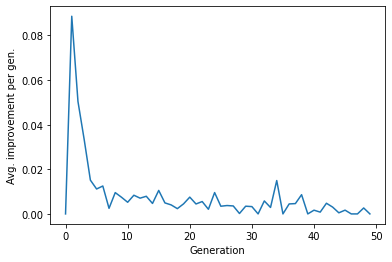

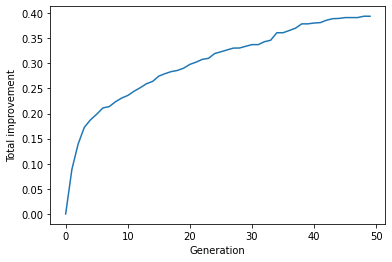

**************************************************************************************************** 
Generation 50/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0018373628092136496
Finished evaluating teritory 0
This generation took 0:07:24 to process.
Remaining 449 generations and approximately 52:18:09
Average improvement for generation: 0.0018373628092136496 . Average total improvement: 0.39567575106099584
Total runtime: 6:45:31


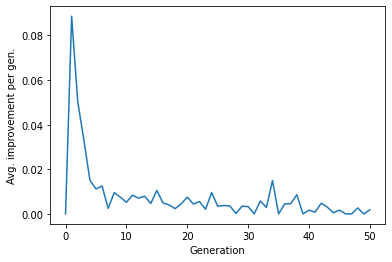

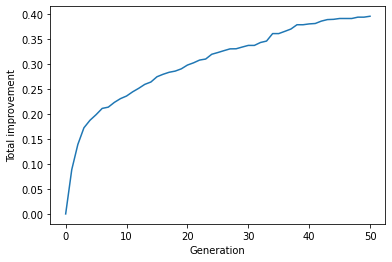

**************************************************************************************************** 
Generation 51/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.000651669325446802
Finished evaluating teritory 0
This generation took 0:06:54 to process.
Remaining 448 generations and approximately 51:54:44
Average improvement for generation: 0.000651669325446802 . Average total improvement: 0.39632742038644264
Total runtime: 6:52:26


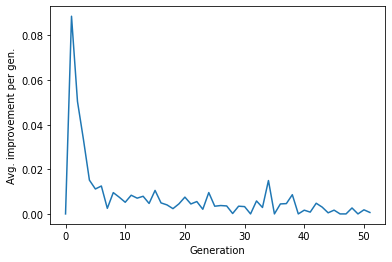

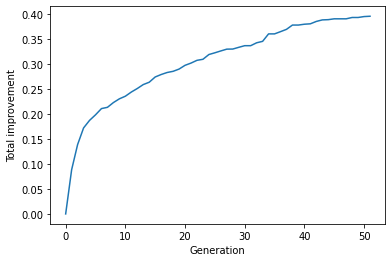

**************************************************************************************************** 
Generation 52/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0024938853142120188
Finished evaluating teritory 0
This generation took 0:05:18 to process.
Remaining 447 generations and approximately 45:39:22
Average improvement for generation: 0.0024938853142120188 . Average total improvement: 0.39882130570065466
Total runtime: 6:57:44


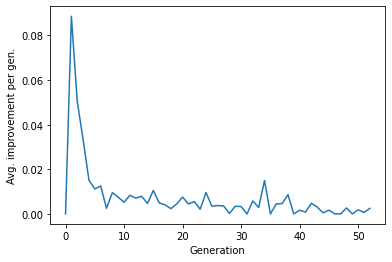

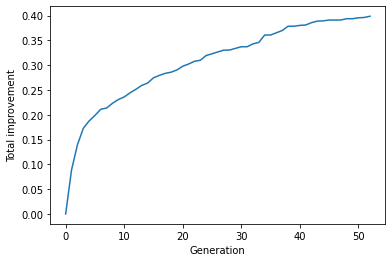

**************************************************************************************************** 
Generation 53/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0030677124946818513
Finished evaluating teritory 0
This generation took 0:07:05 to process.
Remaining 446 generations and approximately 49:07:42
Average improvement for generation: 0.0030677124946818513 . Average total improvement: 0.4018890181953365
Total runtime: 7:04:50


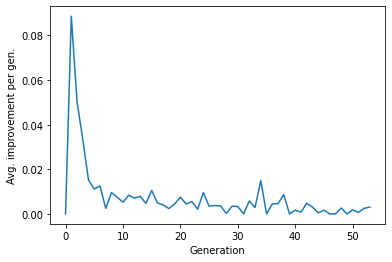

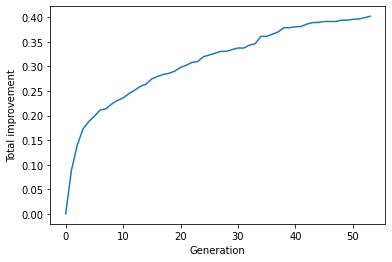

**************************************************************************************************** 
Generation 54/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:52 to process.
Remaining 445 generations and approximately 53:43:56
Average improvement for generation: 0.0 . Average total improvement: 0.4018890181953365
Total runtime: 7:12:42


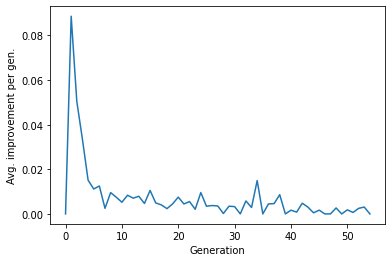

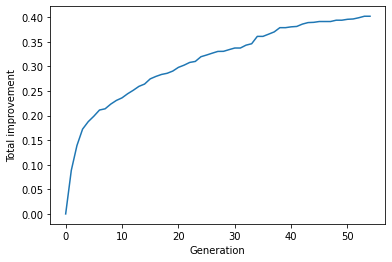

**************************************************************************************************** 
Generation 55/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.00034809687532311173
Finished evaluating teritory 0
This generation took 0:08:14 to process.
Remaining 444 generations and approximately 57:18:13
Average improvement for generation: 0.00034809687532311173 . Average total improvement: 0.4022371150706596
Total runtime: 7:20:57


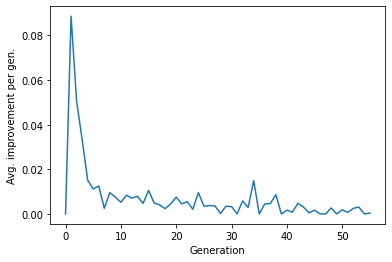

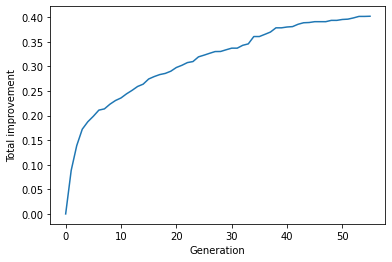

**************************************************************************************************** 
Generation 56/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0006027442492344548
Finished evaluating teritory 0
This generation took 0:11:45 to process.
Remaining 443 generations and approximately 71:59:06
Average improvement for generation: 0.0006027442492344548 . Average total improvement: 0.4028398593198941
Total runtime: 7:32:42


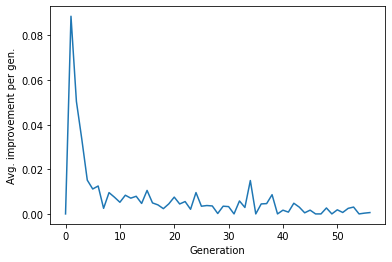

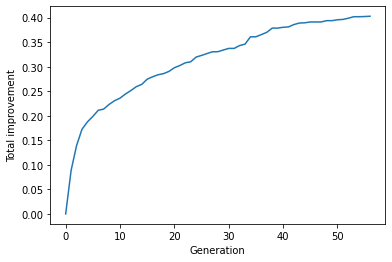

**************************************************************************************************** 
Generation 57/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:06:41 to process.
Remaining 442 generations and approximately 60:35:12
Average improvement for generation: 0.0 . Average total improvement: 0.4028398593198941
Total runtime: 7:39:24


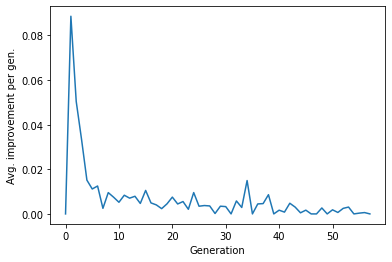

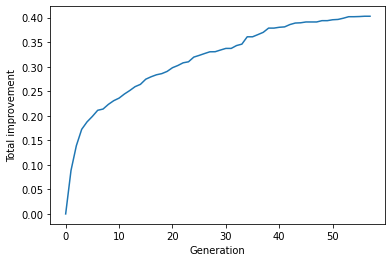

**************************************************************************************************** 
Generation 58/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0013361001526766003
Finished evaluating teritory 0
This generation took 0:09:08 to process.
Remaining 441 generations and approximately 63:50:32
Average improvement for generation: 0.0013361001526766003 . Average total improvement: 0.4041759594725707
Total runtime: 7:48:33


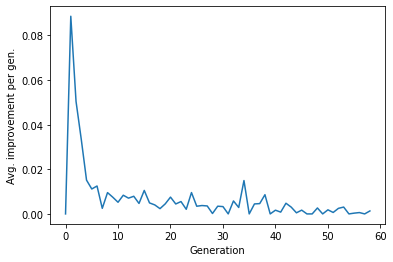

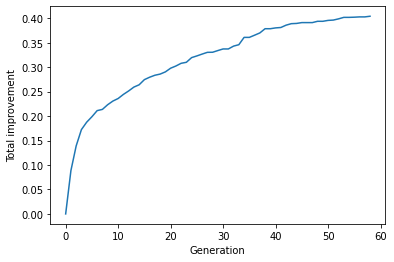

**************************************************************************************************** 
Generation 59/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:06:33 to process.
Remaining 440 generations and approximately 55:52:58
Average improvement for generation: 0.0 . Average total improvement: 0.4041759594725707
Total runtime: 7:55:06


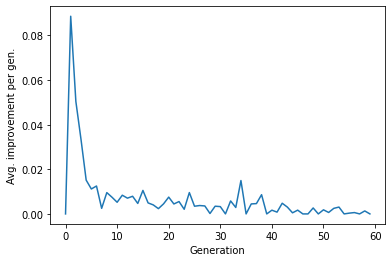

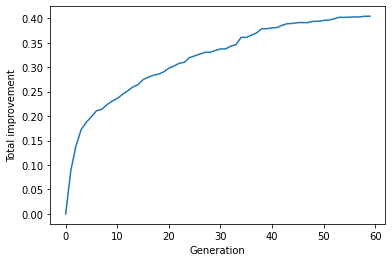

**************************************************************************************************** 
Generation 60/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:05:54 to process.
Remaining 439 generations and approximately 49:28:35
Average improvement for generation: 0.0 . Average total improvement: 0.4041759594725707
Total runtime: 8:01:01


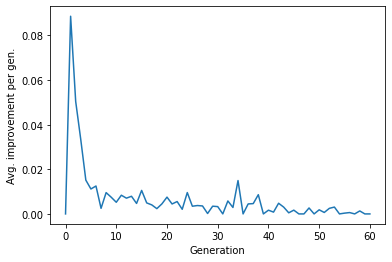

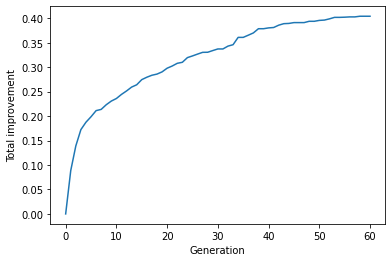

**************************************************************************************************** 
Generation 61/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.004919308825465318
Finished evaluating teritory 0
This generation took 0:06:49 to process.
Remaining 438 generations and approximately 49:35:33
Average improvement for generation: 0.004919308825465318 . Average total improvement: 0.409095268298036
Total runtime: 8:07:50


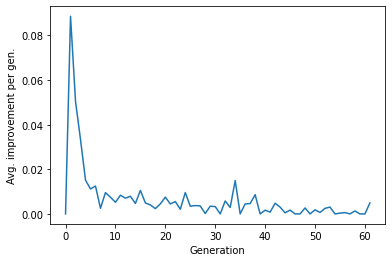

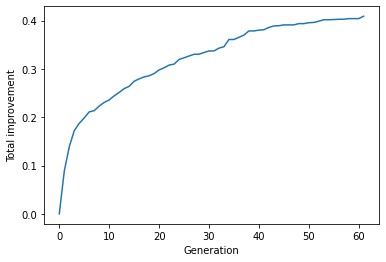

**************************************************************************************************** 
Generation 62/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:02 to process.
Remaining 437 generations and approximately 50:23:15
Average improvement for generation: 0.0 . Average total improvement: 0.409095268298036
Total runtime: 8:14:53


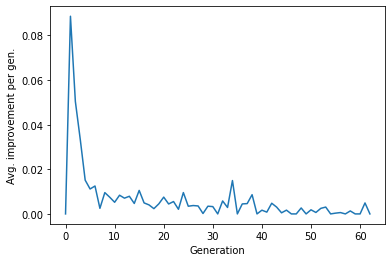

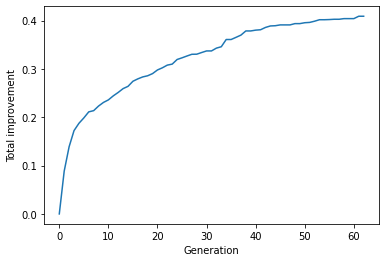

**************************************************************************************************** 
Generation 63/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0039284834328163765
Finished evaluating teritory 0
This generation took 0:08:28 to process.
Remaining 436 generations and approximately 55:56:06
Average improvement for generation: 0.0039284834328163765 . Average total improvement: 0.4130237517308524
Total runtime: 8:23:21


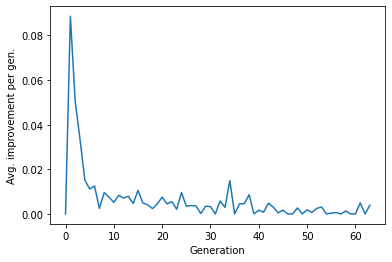

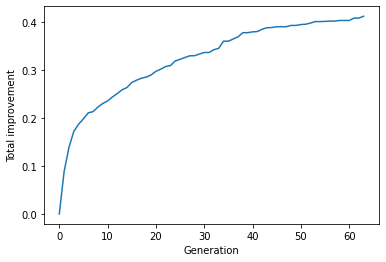

**************************************************************************************************** 
Generation 64/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:06:07 to process.
Remaining 435 generations and approximately 50:07:11
Average improvement for generation: 0.0 . Average total improvement: 0.4130237517308524
Total runtime: 8:29:29


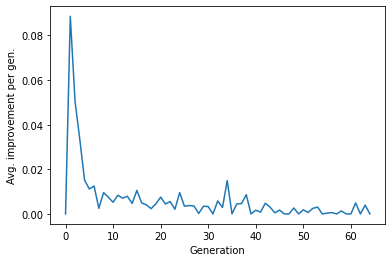

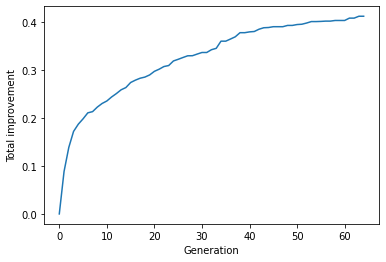

**************************************************************************************************** 
Generation 65/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.004763200262490219
Finished evaluating teritory 0
This generation took 0:09:24 to process.
Remaining 434 generations and approximately 59:03:07
Average improvement for generation: 0.004763200262490219 . Average total improvement: 0.4177869519933426
Total runtime: 8:38:54


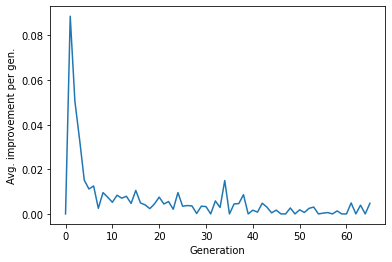

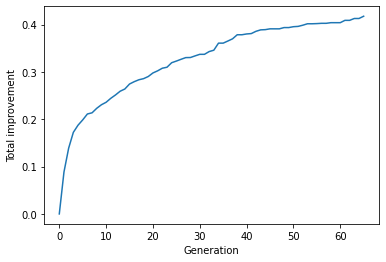

**************************************************************************************************** 
Generation 66/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.004230334246667189
Finished evaluating teritory 0
This generation took 0:07:45 to process.
Remaining 433 generations and approximately 57:25:34
Average improvement for generation: 0.004230334246667189 . Average total improvement: 0.4220172862400098
Total runtime: 8:46:39


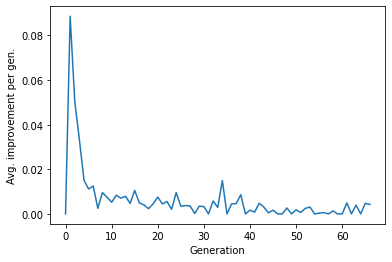

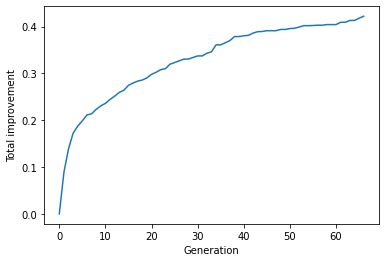

**************************************************************************************************** 
Generation 67/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:06:31 to process.
Remaining 432 generations and approximately 52:09:22
Average improvement for generation: 0.0 . Average total improvement: 0.4220172862400098
Total runtime: 8:53:11


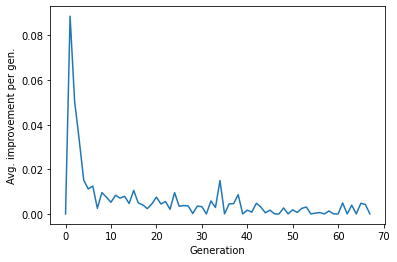

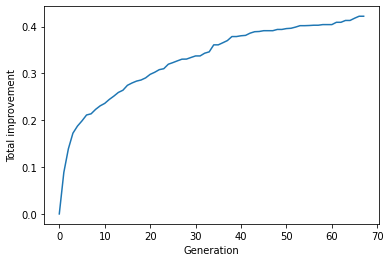

**************************************************************************************************** 
Generation 68/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0031985745191345227
Finished evaluating teritory 0
This generation took 0:07:17 to process.
Remaining 431 generations and approximately 52:12:18
Average improvement for generation: 0.0031985745191345227 . Average total improvement: 0.4252158607591443
Total runtime: 9:00:28


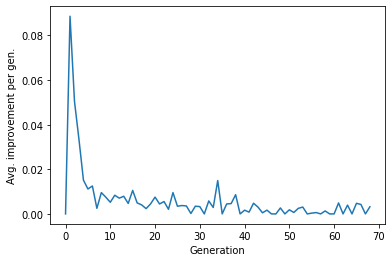

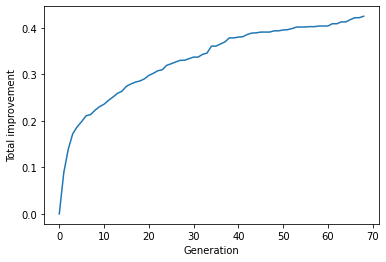

**************************************************************************************************** 
Generation 69/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:06:43 to process.
Remaining 430 generations and approximately 50:10:01
Average improvement for generation: 0.0 . Average total improvement: 0.4252158607591443
Total runtime: 9:07:12


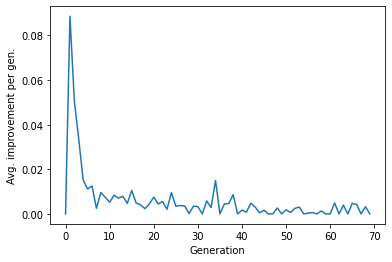

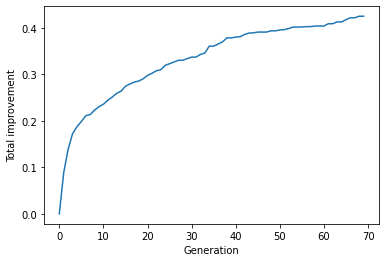

**************************************************************************************************** 
Generation 70/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0018114469421590673
Finished evaluating teritory 0
This generation took 0:11:25 to process.
Remaining 429 generations and approximately 65:53:07
Average improvement for generation: 0.0018114469421590673 . Average total improvement: 0.42702730770130337
Total runtime: 9:18:38


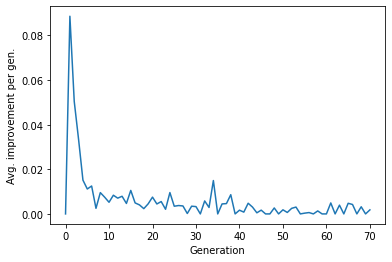

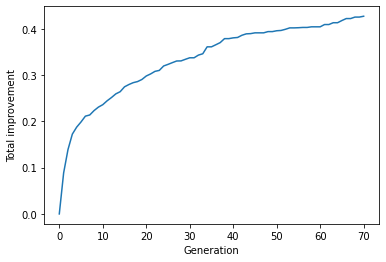

**************************************************************************************************** 
Generation 71/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:02:52 to process.
Remaining 428 generations and approximately 43:07:16
Average improvement for generation: 0.0 . Average total improvement: 0.42702730770130337
Total runtime: 9:21:31


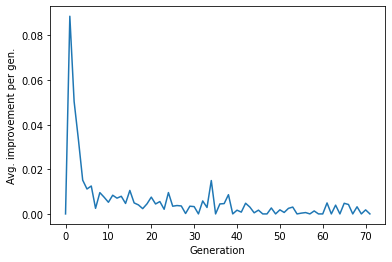

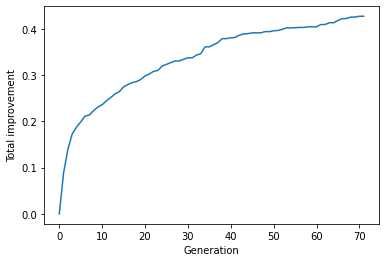

**************************************************************************************************** 
Generation 72/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.001790455574715022
Finished evaluating teritory 0
This generation took 0:08:39 to process.
Remaining 427 generations and approximately 52:18:20
Average improvement for generation: 0.001790455574715022 . Average total improvement: 0.4288177632760184
Total runtime: 9:30:10


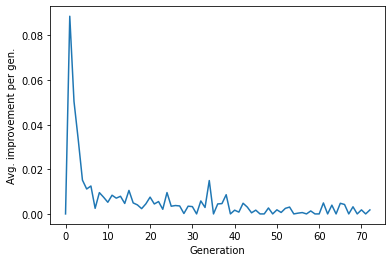

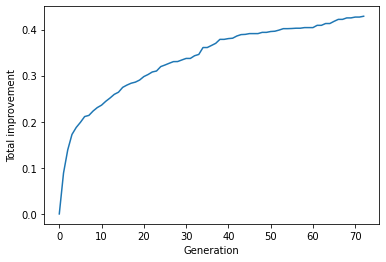

**************************************************************************************************** 
Generation 73/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0008261427523503784
Finished evaluating teritory 0
This generation took 0:07:24 to process.
Remaining 426 generations and approximately 52:25:00
Average improvement for generation: 0.0008261427523503784 . Average total improvement: 0.42964390602836877
Total runtime: 9:37:35


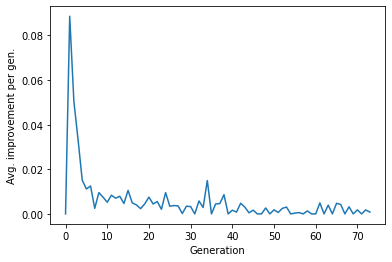

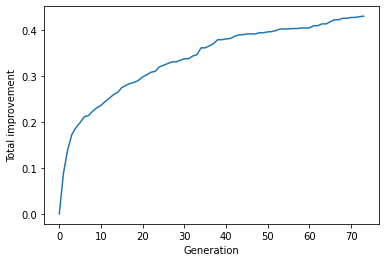

**************************************************************************************************** 
Generation 74/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.002353231683927426
Finished evaluating teritory 0
This generation took 0:07:14 to process.
Remaining 425 generations and approximately 51:47:07
Average improvement for generation: 0.002353231683927426 . Average total improvement: 0.4319971377122962
Total runtime: 9:44:49


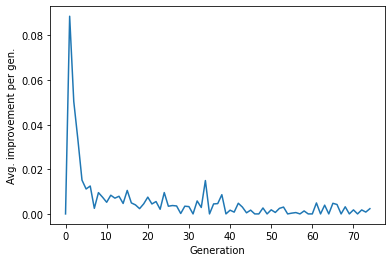

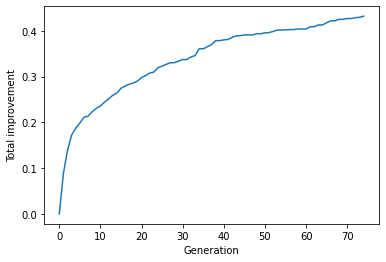

**************************************************************************************************** 
Generation 75/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0003967590756661643
Finished evaluating teritory 0
This generation took 0:08:15 to process.
Remaining 424 generations and approximately 55:00:50
Average improvement for generation: 0.0003967590756661643 . Average total improvement: 0.43239389678796236
Total runtime: 9:53:05


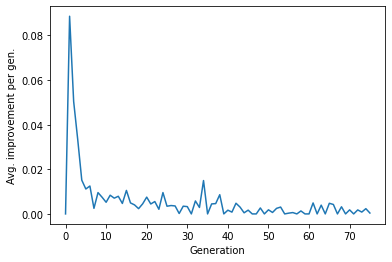

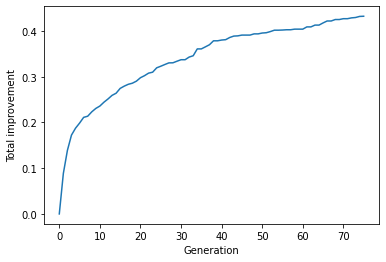

**************************************************************************************************** 
Generation 76/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0006835214447400428
Finished evaluating teritory 0
This generation took 0:06:08 to process.
Remaining 423 generations and approximately 49:05:56
Average improvement for generation: 0.0006835214447400428 . Average total improvement: 0.4330774182327024
Total runtime: 9:59:13


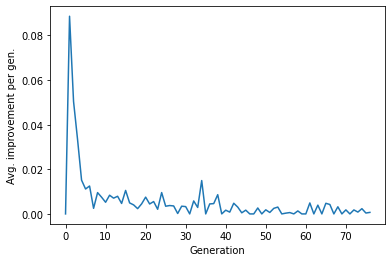

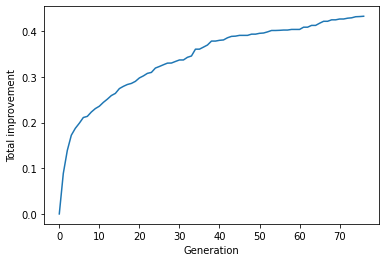

**************************************************************************************************** 
Generation 77/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:12:08 to process.
Remaining 422 generations and approximately 67:12:25
Average improvement for generation: 0.0 . Average total improvement: 0.4330774182327024
Total runtime: 10:11:22


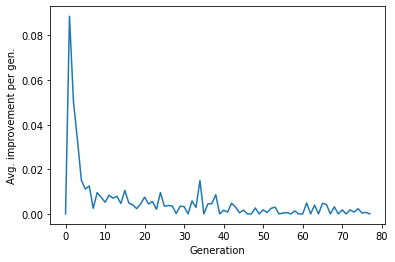

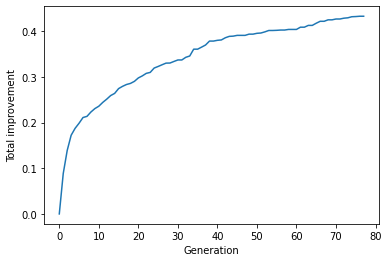

**************************************************************************************************** 
Generation 78/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:36 to process.
Remaining 421 generations and approximately 60:11:14
Average improvement for generation: 0.0 . Average total improvement: 0.4330774182327024
Total runtime: 10:18:58


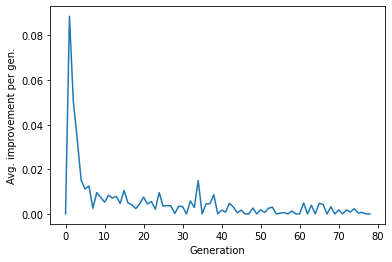

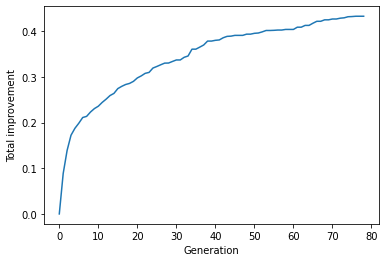

**************************************************************************************************** 
Generation 79/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.002211589246753576
Finished evaluating teritory 0
This generation took 0:08:22 to process.
Remaining 420 generations and approximately 59:21:04
Average improvement for generation: 0.002211589246753576 . Average total improvement: 0.435289007479456
Total runtime: 10:27:21


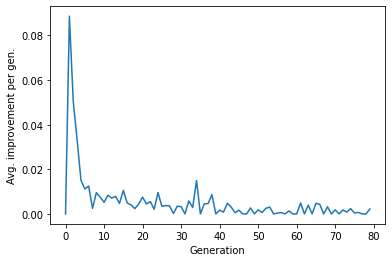

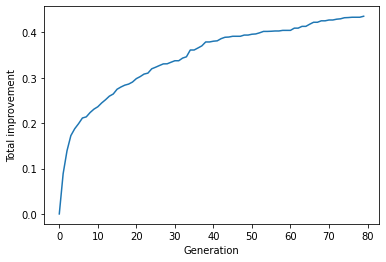

**************************************************************************************************** 
Generation 80/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0013784081454670805
Finished evaluating teritory 0
This generation took 0:06:58 to process.
Remaining 419 generations and approximately 53:57:06
Average improvement for generation: 0.0013784081454670805 . Average total improvement: 0.43666741562492306
Total runtime: 10:34:19


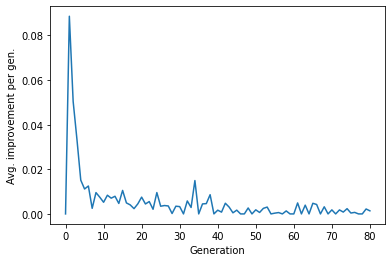

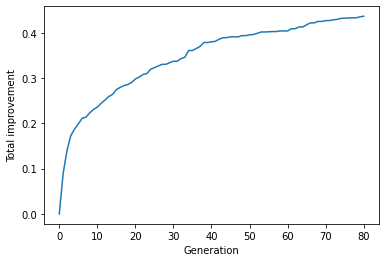

**************************************************************************************************** 
Generation 81/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0013776756675196733
Finished evaluating teritory 0
This generation took 0:03:30 to process.
Remaining 418 generations and approximately 39:07:40
Average improvement for generation: 0.0013776756675196733 . Average total improvement: 0.43804509129244273
Total runtime: 10:37:50


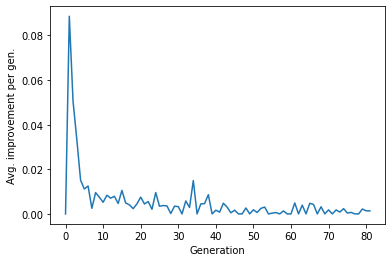

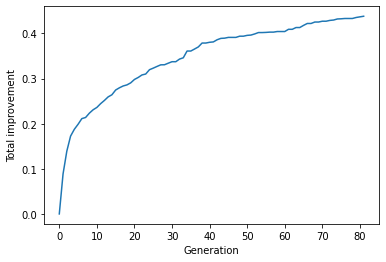

**************************************************************************************************** 
Generation 82/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0003942725813113057
Finished evaluating teritory 0
This generation took 0:08:17 to process.
Remaining 417 generations and approximately 48:21:33
Average improvement for generation: 0.0003942725813113057 . Average total improvement: 0.43843936387375404
Total runtime: 10:46:08


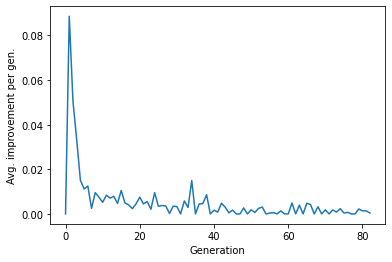

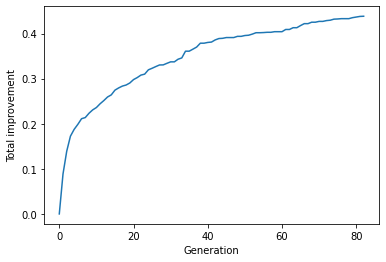

**************************************************************************************************** 
Generation 83/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:04:16 to process.
Remaining 416 generations and approximately 38:57:39
Average improvement for generation: 0.0 . Average total improvement: 0.43843936387375404
Total runtime: 10:50:24


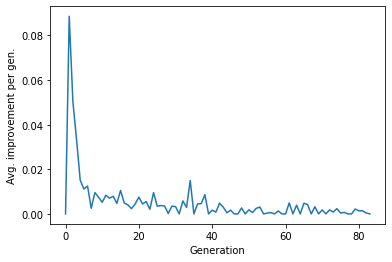

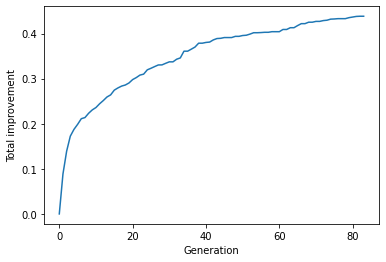

**************************************************************************************************** 
Generation 84/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0027793125833601717
Finished evaluating teritory 0
This generation took 0:06:10 to process.
Remaining 415 generations and approximately 40:48:18
Average improvement for generation: 0.0027793125833601717 . Average total improvement: 0.4412186764571142
Total runtime: 10:56:35


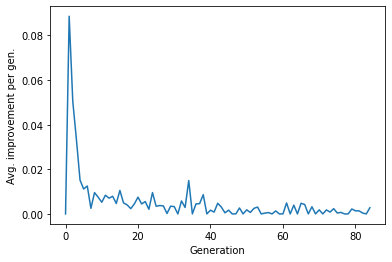

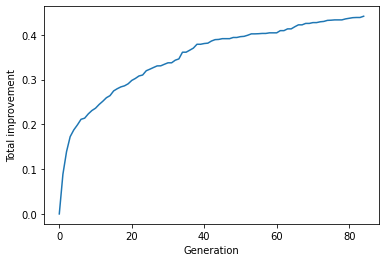

**************************************************************************************************** 
Generation 85/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:05:57 to process.
Remaining 414 generations and approximately 40:55:28
Average improvement for generation: 0.0 . Average total improvement: 0.4412186764571142
Total runtime: 11:02:33


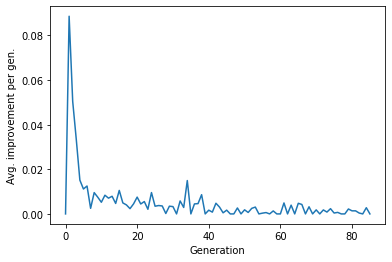

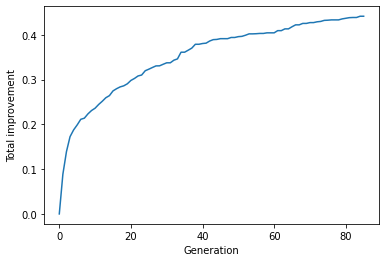

**************************************************************************************************** 
Generation 86/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0007230684927777009
Finished evaluating teritory 0
This generation took 0:05:55 to process.
Remaining 413 generations and approximately 40:46:43
Average improvement for generation: 0.0007230684927777009 . Average total improvement: 0.4419417449498919
Total runtime: 11:08:28


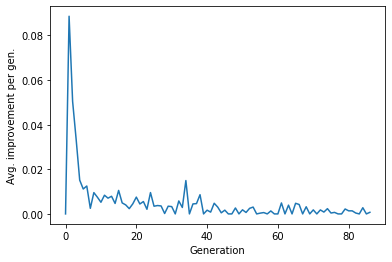

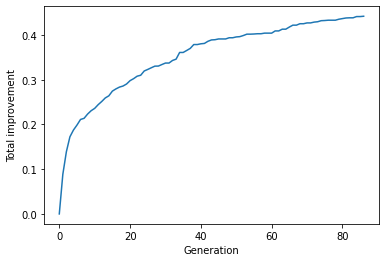

**************************************************************************************************** 
Generation 87/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0036340180089620144
Finished evaluating teritory 0
This generation took 0:05:29 to process.
Remaining 412 generations and approximately 39:11:43
Average improvement for generation: 0.0036340180089620144 . Average total improvement: 0.4455757629588539
Total runtime: 11:13:58


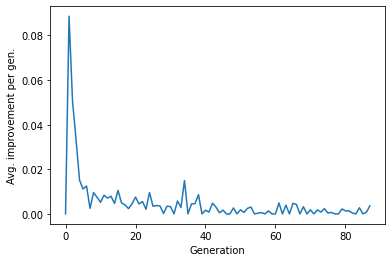

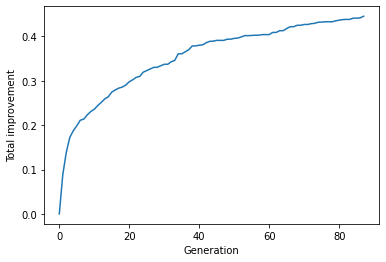

**************************************************************************************************** 
Generation 88/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0005796301787266422
Finished evaluating teritory 0
This generation took 0:08:46 to process.
Remaining 411 generations and approximately 49:36:05
Average improvement for generation: 0.0005796301787266422 . Average total improvement: 0.44615539313758057
Total runtime: 11:22:44


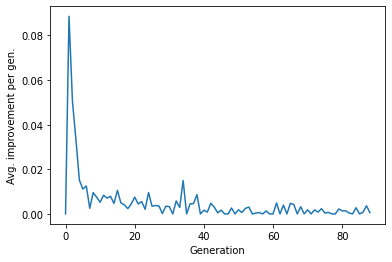

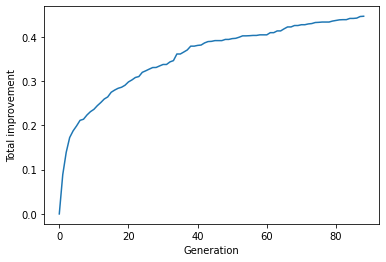

**************************************************************************************************** 
Generation 89/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.002067649511668046
Finished evaluating teritory 0
This generation took 0:09:50 to process.
Remaining 410 generations and approximately 58:21:17
Average improvement for generation: 0.002067649511668046 . Average total improvement: 0.4482230426492486
Total runtime: 11:32:34


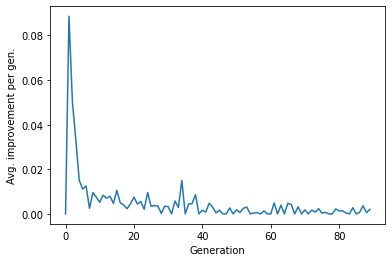

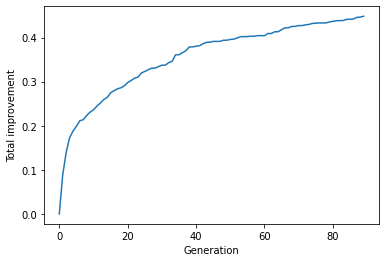

**************************************************************************************************** 
Generation 90/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:52 to process.
Remaining 409 generations and approximately 59:21:25
Average improvement for generation: 0.0 . Average total improvement: 0.4482230426492486
Total runtime: 11:41:27


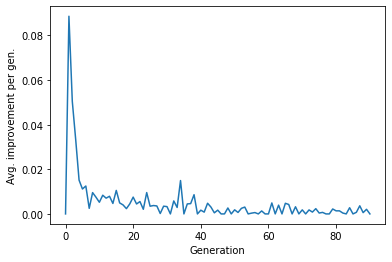

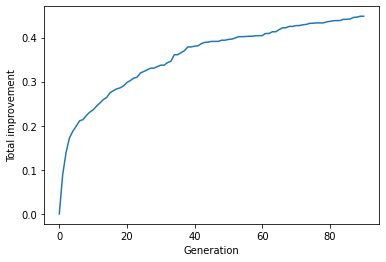

**************************************************************************************************** 
Generation 91/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0014213213436913286
Finished evaluating teritory 0
This generation took 0:05:36 to process.
Remaining 408 generations and approximately 48:40:35
Average improvement for generation: 0.0014213213436913286 . Average total improvement: 0.44964436399293994
Total runtime: 11:47:03


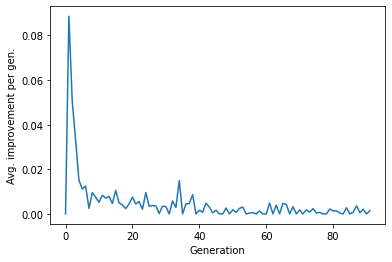

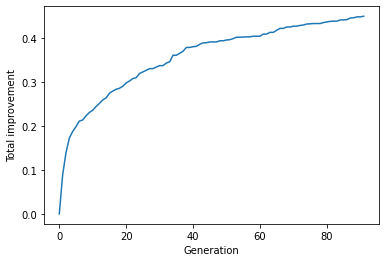

**************************************************************************************************** 
Generation 92/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0006372612618186224
Finished evaluating teritory 0
This generation took 0:09:36 to process.
Remaining 407 generations and approximately 56:52:12
Average improvement for generation: 0.0006372612618186224 . Average total improvement: 0.45028162525475857
Total runtime: 11:56:40


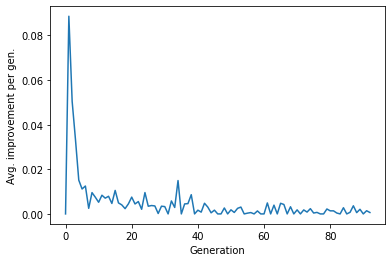

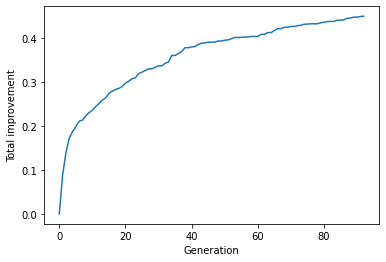

**************************************************************************************************** 
Generation 93/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:03 to process.
Remaining 406 generations and approximately 55:38:55
Average improvement for generation: 0.0 . Average total improvement: 0.45028162525475857
Total runtime: 12:04:44


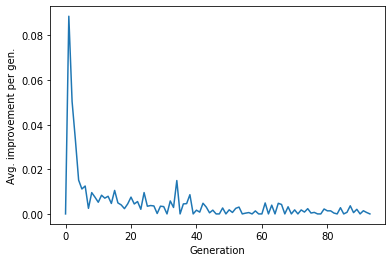

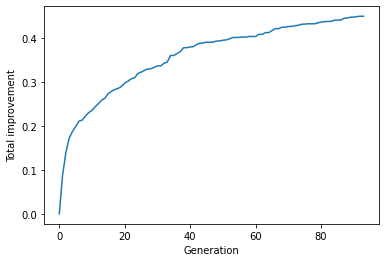

**************************************************************************************************** 
Generation 94/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:04:18 to process.
Remaining 405 generations and approximately 42:17:28
Average improvement for generation: 0.0 . Average total improvement: 0.45028162525475857
Total runtime: 12:09:02


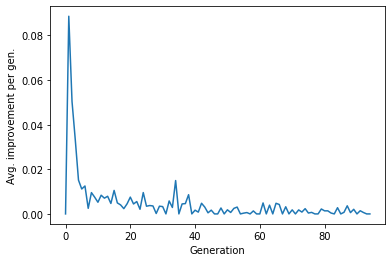

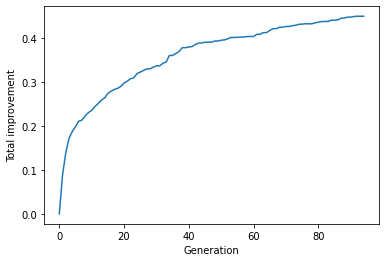

**************************************************************************************************** 
Generation 95/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0018256806221865762
Finished evaluating teritory 0
This generation took 0:06:29 to process.
Remaining 404 generations and approximately 42:57:02
Average improvement for generation: 0.0018256806221865762 . Average total improvement: 0.45210730587694514
Total runtime: 12:15:32


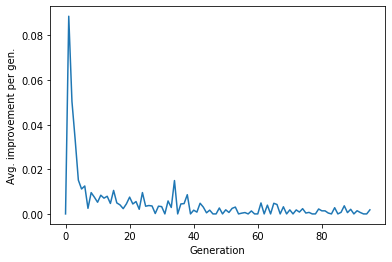

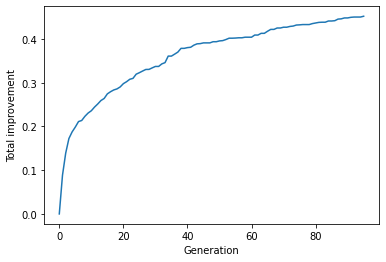

**************************************************************************************************** 
Generation 96/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.00033654982737796324
Finished evaluating teritory 0
This generation took 0:07:00 to process.
Remaining 403 generations and approximately 44:55:56
Average improvement for generation: 0.00033654982737796324 . Average total improvement: 0.4524438557043231
Total runtime: 12:22:32


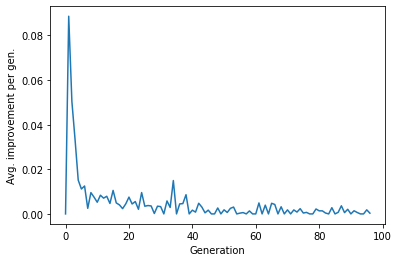

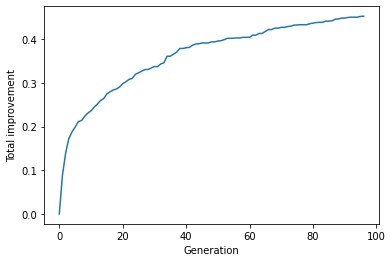

**************************************************************************************************** 
Generation 97/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.00112354907620138
Finished evaluating teritory 0
This generation took 0:05:46 to process.
Remaining 402 generations and approximately 41:46:02
Average improvement for generation: 0.00112354907620138 . Average total improvement: 0.4535674047805245
Total runtime: 12:28:18


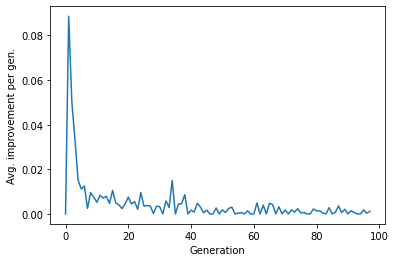

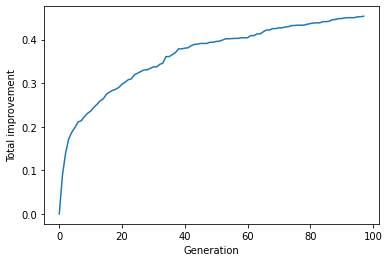

**************************************************************************************************** 
Generation 98/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:31 to process.
Remaining 401 generations and approximately 45:58:21
Average improvement for generation: 0.0 . Average total improvement: 0.4535674047805245
Total runtime: 12:35:50


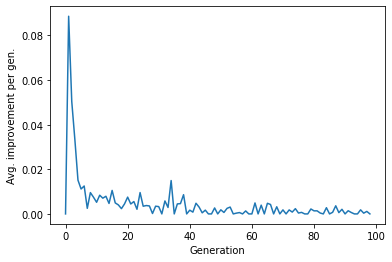

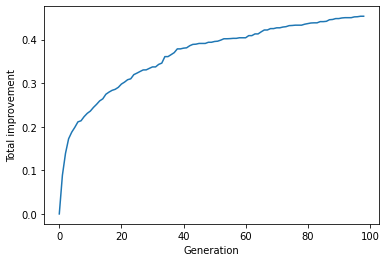

**************************************************************************************************** 
Generation 99/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:37 to process.
Remaining 400 generations and approximately 48:20:56
Average improvement for generation: 0.0 . Average total improvement: 0.4535674047805245
Total runtime: 12:43:27


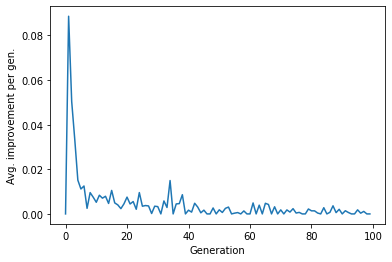

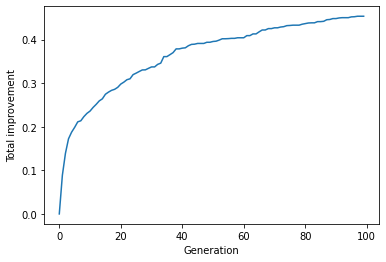

**************************************************************************************************** 
Generation 100/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:05:19 to process.
Remaining 399 generations and approximately 41:48:50
Average improvement for generation: 0.0 . Average total improvement: 0.4535674047805245
Total runtime: 12:48:47


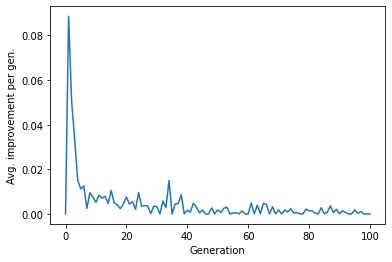

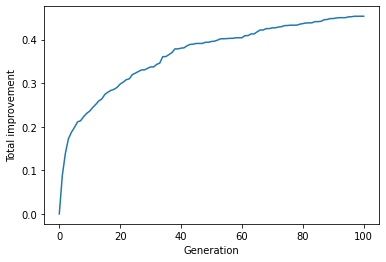

**************************************************************************************************** 
Generation 101/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:05:49 to process.
Remaining 398 generations and approximately 40:10:58
Average improvement for generation: 0.0 . Average total improvement: 0.4535674047805245
Total runtime: 12:54:37


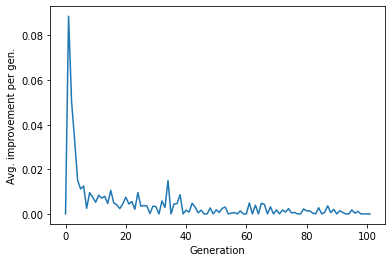

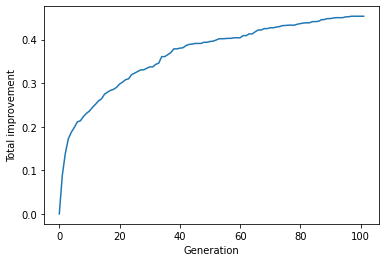

**************************************************************************************************** 
Generation 102/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:14:30 to process.
Remaining 397 generations and approximately 68:02:19
Average improvement for generation: 0.0 . Average total improvement: 0.4535674047805245
Total runtime: 13:09:07


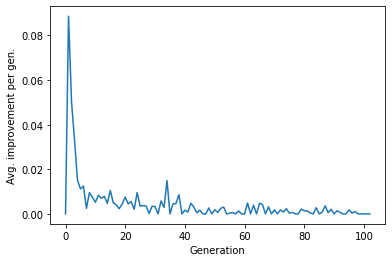

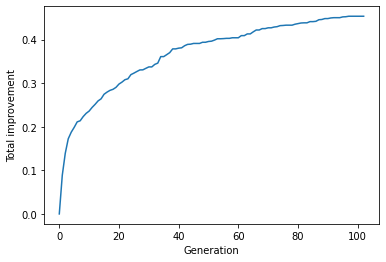

**************************************************************************************************** 
Generation 103/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:40 to process.
Remaining 396 generations and approximately 59:16:51
Average improvement for generation: 0.0 . Average total improvement: 0.4535674047805245
Total runtime: 13:16:48


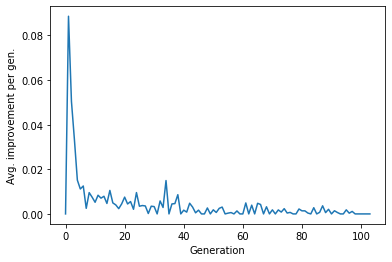

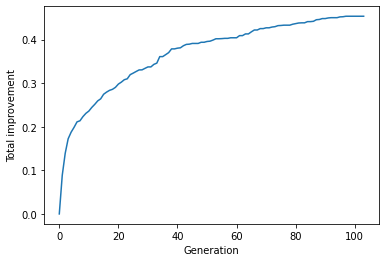

**************************************************************************************************** 
Generation 104/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:09:33 to process.
Remaining 395 generations and approximately 61:01:27
Average improvement for generation: 0.0 . Average total improvement: 0.4535674047805245
Total runtime: 13:26:21


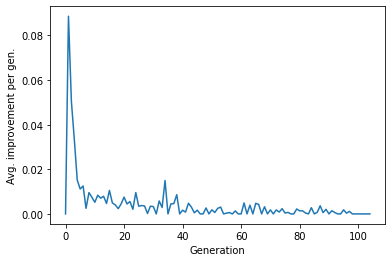

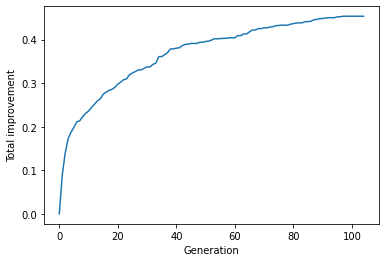

**************************************************************************************************** 
Generation 105/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0017557216574080048
Finished evaluating teritory 0
This generation took 0:08:19 to process.
Remaining 394 generations and approximately 57:46:06
Average improvement for generation: 0.0017557216574080048 . Average total improvement: 0.4553231264379325
Total runtime: 13:34:41


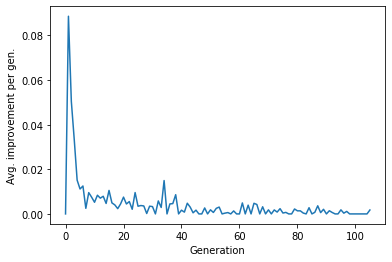

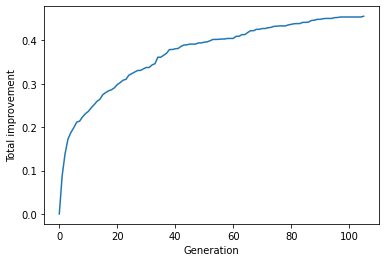

**************************************************************************************************** 
Generation 106/500
....................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.004448869541057832
Finished evaluating teritory 0
This generation took 0:07:32 to process.
Remaining 393 generations and approximately 53:31:50
Average improvement for generation: 0.004448869541057832 . Average total improvement: 0.4597719959789903
Total runtime: 13:42:14


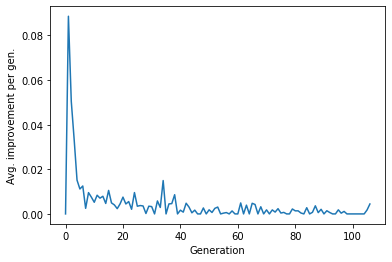

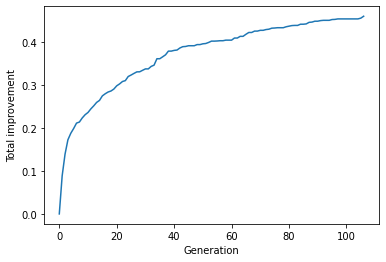

**************************************************************************************************** 
Generation 107/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0023737833705403943
Finished evaluating teritory 0
This generation took 0:07:45 to process.
Remaining 392 generations and approximately 52:02:28
Average improvement for generation: 0.0023737833705403943 . Average total improvement: 0.4621457793495307
Total runtime: 13:49:59


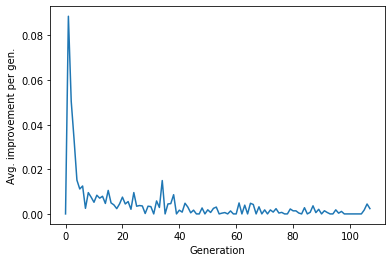

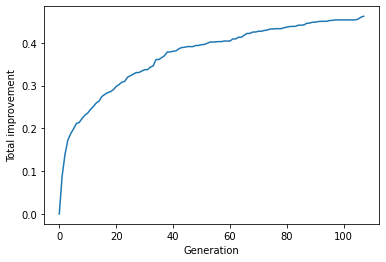

**************************************************************************************************** 
Generation 108/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0005367268838432082
Finished evaluating teritory 0
This generation took 0:08:56 to process.
Remaining 391 generations and approximately 55:05:11
Average improvement for generation: 0.0005367268838432082 . Average total improvement: 0.4626825062333739
Total runtime: 13:58:56


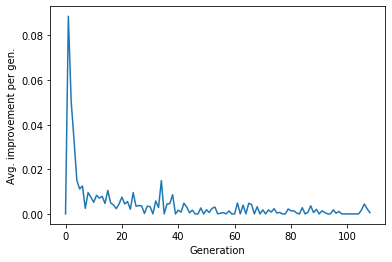

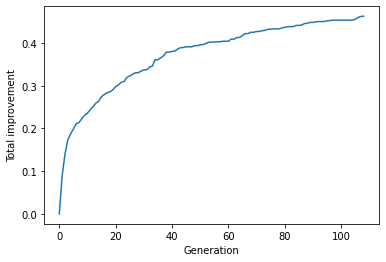

**************************************************************************************************** 
Generation 109/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:40 to process.
Remaining 390 generations and approximately 55:39:13
Average improvement for generation: 0.0 . Average total improvement: 0.4626825062333739
Total runtime: 14:07:36


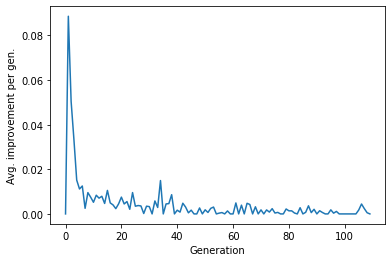

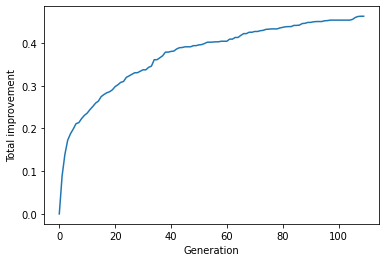

**************************************************************************************************** 
Generation 110/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0007507677549882796
Finished evaluating teritory 0
This generation took 0:06:35 to process.
Remaining 389 generations and approximately 49:06:53
Average improvement for generation: 0.0007507677549882796 . Average total improvement: 0.4634332739883622
Total runtime: 14:14:11


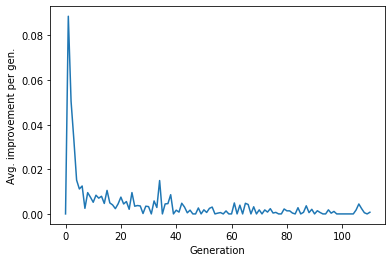

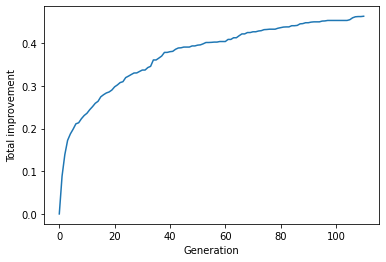

**************************************************************************************************** 
Generation 111/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0001079399440635509
Finished evaluating teritory 0
This generation took 0:08:41 to process.
Remaining 388 generations and approximately 52:35:34
Average improvement for generation: 0.0001079399440635509 . Average total improvement: 0.46354121393242576
Total runtime: 14:22:53


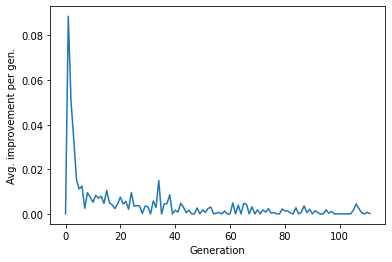

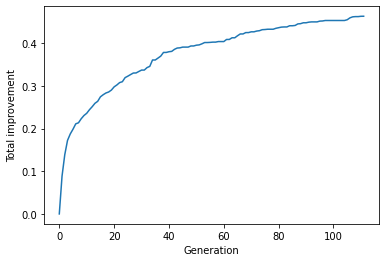

**************************************************************************************************** 
Generation 112/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:09:47 to process.
Remaining 387 generations and approximately 57:49:27
Average improvement for generation: 0.0 . Average total improvement: 0.46354121393242576
Total runtime: 14:32:40


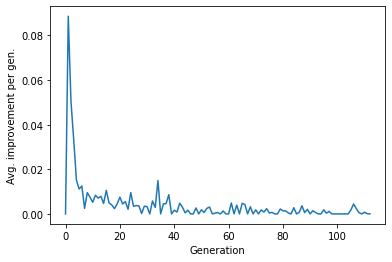

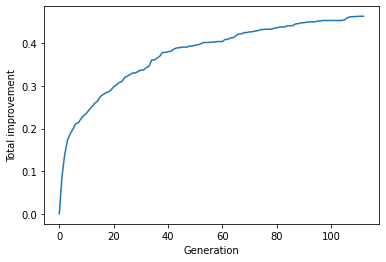

**************************************************************************************************** 
Generation 113/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:01 to process.
Remaining 386 generations and approximately 51:26:19
Average improvement for generation: 0.0 . Average total improvement: 0.46354121393242576
Total runtime: 14:39:42


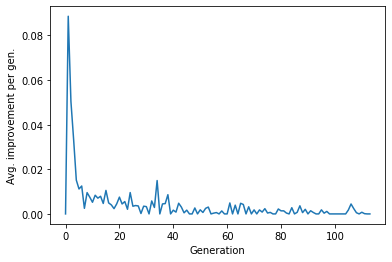

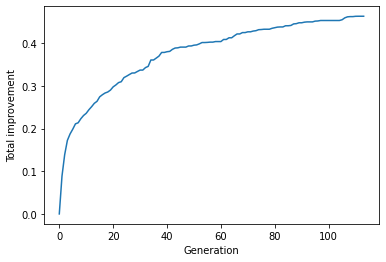

**************************************************************************************************** 
Generation 114/500
.....................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0027022212576148785
Finished evaluating teritory 0
This generation took 0:07:44 to process.
Remaining 385 generations and approximately 50:29:16
Average improvement for generation: 0.0027022212576148785 . Average total improvement: 0.46624343519004063
Total runtime: 14:47:26


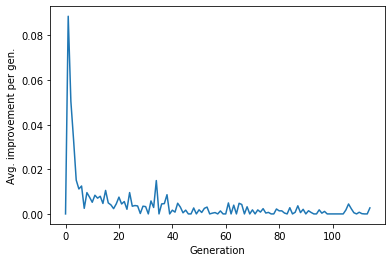

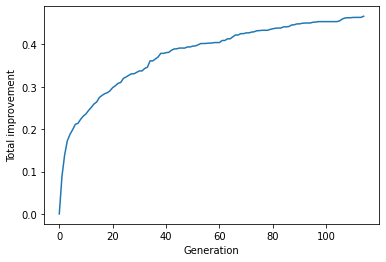

**************************************************************************************************** 
Generation 115/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:04:44 to process.
Remaining 384 generations and approximately 40:20:04
Average improvement for generation: 0.0 . Average total improvement: 0.46624343519004063
Total runtime: 14:52:11


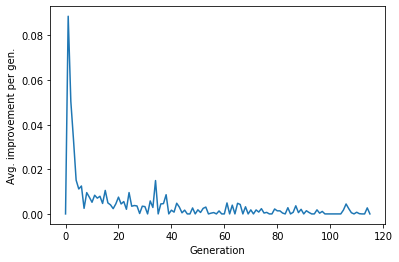

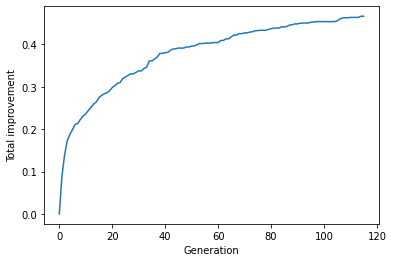

**************************************************************************************************** 
Generation 116/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0024797487021033238
Finished evaluating teritory 0
This generation took 0:09:05 to process.
Remaining 383 generations and approximately 49:06:53
Average improvement for generation: 0.0024797487021033238 . Average total improvement: 0.46872318389214396
Total runtime: 15:01:16


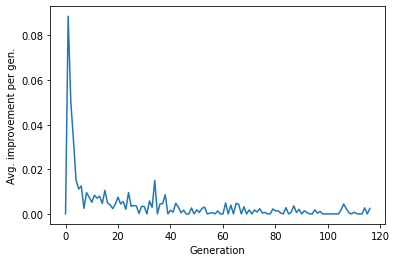

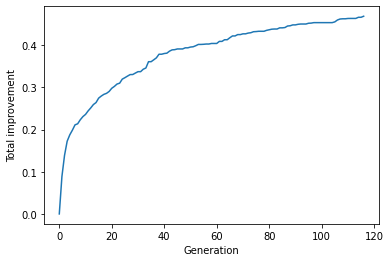

**************************************************************************************************** 
Generation 117/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.000346746475703652
Finished evaluating teritory 0
This generation took 0:07:52 to process.
Remaining 382 generations and approximately 49:33:53
Average improvement for generation: 0.000346746475703652 . Average total improvement: 0.4690699303678476
Total runtime: 15:09:08


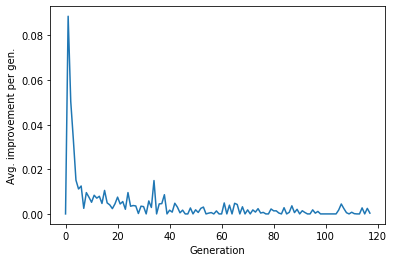

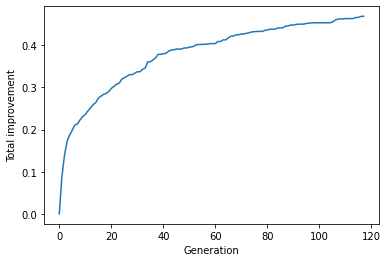

**************************************************************************************************** 
Generation 118/500
.....................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.005623716123775324
Finished evaluating teritory 0
This generation took 0:09:29 to process.
Remaining 381 generations and approximately 54:52:29
Average improvement for generation: 0.005623716123775324 . Average total improvement: 0.47469364649162293
Total runtime: 15:18:38


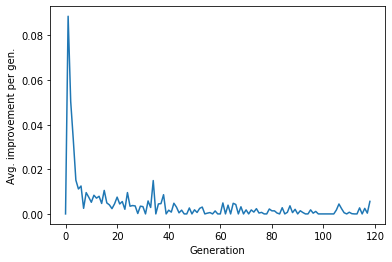

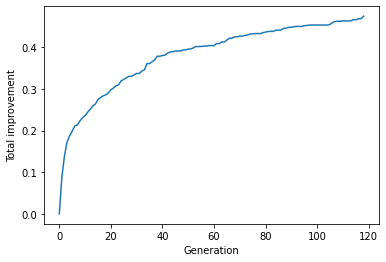

**************************************************************************************************** 
Generation 119/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0004689988426671565
Finished evaluating teritory 0
This generation took 0:07:58 to process.
Remaining 380 generations and approximately 52:35:50
Average improvement for generation: 0.0004689988426671565 . Average total improvement: 0.4751626453342901
Total runtime: 15:26:36


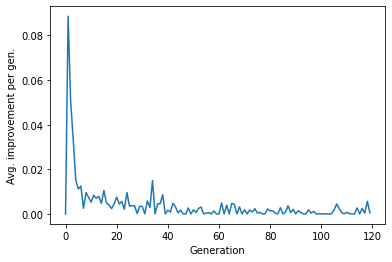

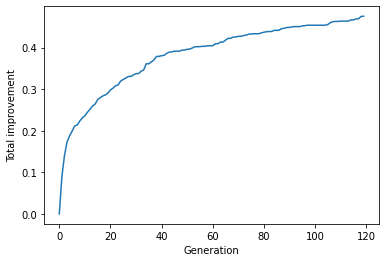

**************************************************************************************************** 
Generation 120/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:05:36 to process.
Remaining 379 generations and approximately 43:57:35
Average improvement for generation: 0.0 . Average total improvement: 0.4751626453342901
Total runtime: 15:32:13


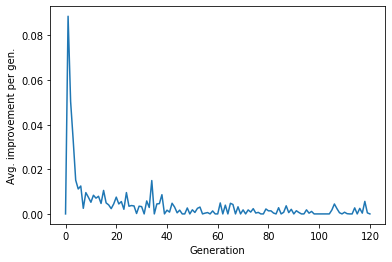

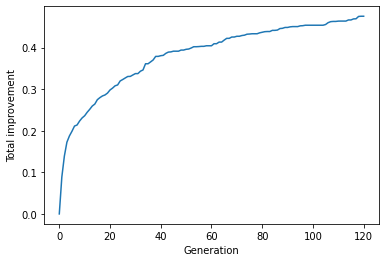

**************************************************************************************************** 
Generation 121/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0016288871848220143
Finished evaluating teritory 0
This generation took 0:11:31 to process.
Remaining 378 generations and approximately 58:12:31
Average improvement for generation: 0.0016288871848220143 . Average total improvement: 0.4767915325191121
Total runtime: 15:43:44


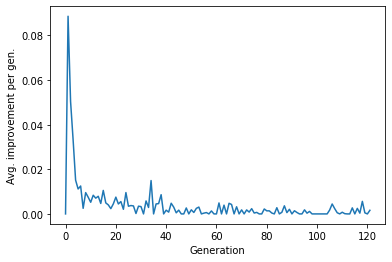

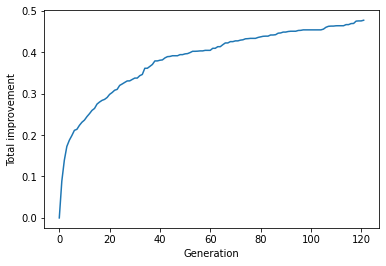

**************************************************************************************************** 
Generation 122/500
.....................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:05:29 to process.
Remaining 377 generations and approximately 46:17:33
Average improvement for generation: 0.0 . Average total improvement: 0.4767915325191121
Total runtime: 15:49:14


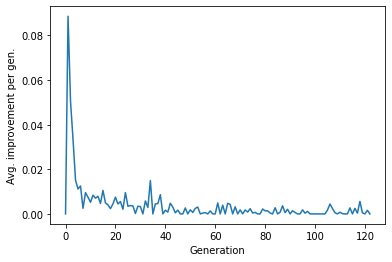

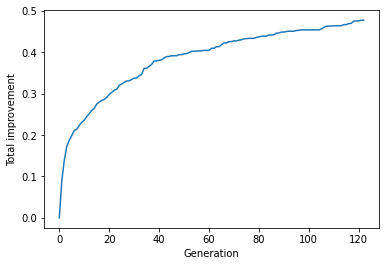

**************************************************************************************************** 
Generation 123/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.001339569615683489
Finished evaluating teritory 0
This generation took 0:07:17 to process.
Remaining 376 generations and approximately 45:54:28
Average improvement for generation: 0.001339569615683489 . Average total improvement: 0.4781311021347956
Total runtime: 15:56:31


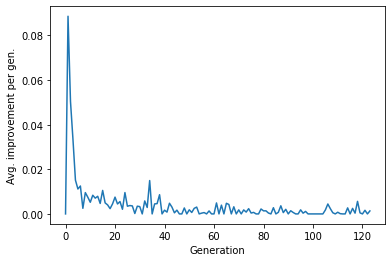

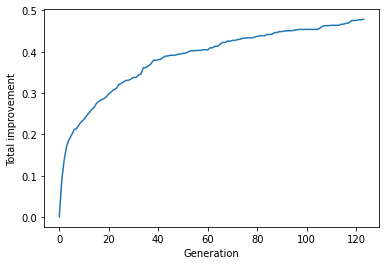

**************************************************************************************************** 
Generation 124/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:06:17 to process.
Remaining 375 generations and approximately 42:32:49
Average improvement for generation: 0.0 . Average total improvement: 0.4781311021347956
Total runtime: 16:02:49


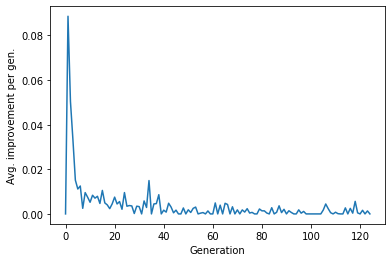

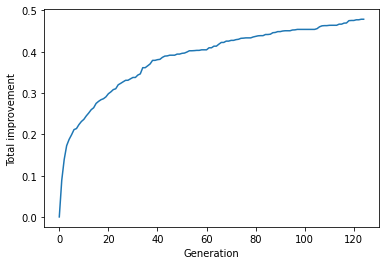

**************************************************************************************************** 
Generation 125/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:05 to process.
Remaining 374 generations and approximately 46:26:21
Average improvement for generation: 0.0 . Average total improvement: 0.4781311021347956
Total runtime: 16:10:54


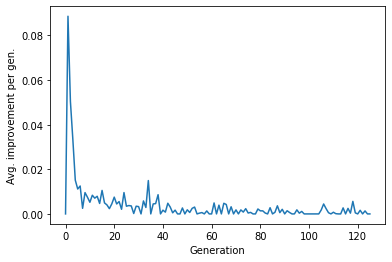

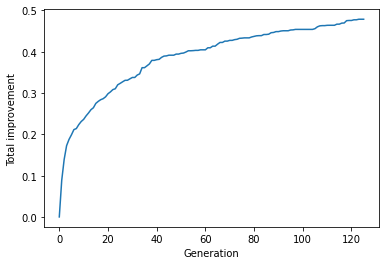

**************************************************************************************************** 
Generation 126/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:57 to process.
Remaining 373 generations and approximately 47:53:28
Average improvement for generation: 0.0 . Average total improvement: 0.4781311021347956
Total runtime: 16:18:52


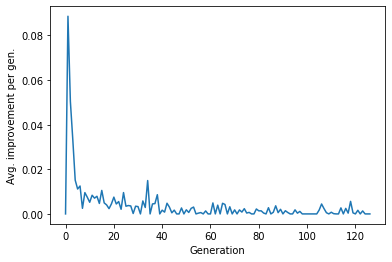

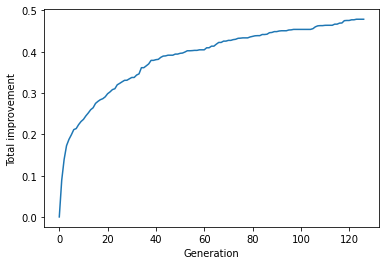

**************************************************************************************************** 
Generation 127/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:13:17 to process.
Remaining 372 generations and approximately 65:04:45
Average improvement for generation: 0.0 . Average total improvement: 0.4781311021347956
Total runtime: 16:32:09


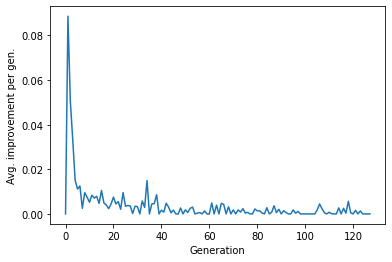

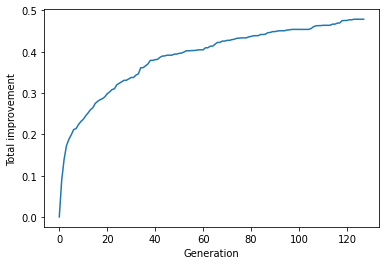

**************************************************************************************************** 
Generation 128/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:56 to process.
Remaining 371 generations and approximately 60:06:42
Average improvement for generation: 0.0 . Average total improvement: 0.4781311021347956
Total runtime: 16:41:06


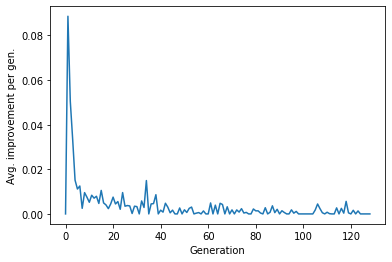

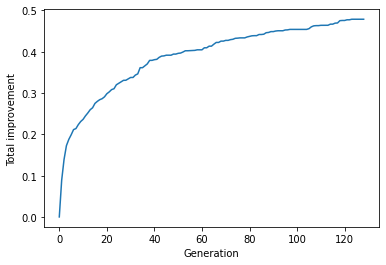

**************************************************************************************************** 
Generation 129/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:35 to process.
Remaining 370 generations and approximately 53:22:51
Average improvement for generation: 0.0 . Average total improvement: 0.4781311021347956
Total runtime: 16:48:41


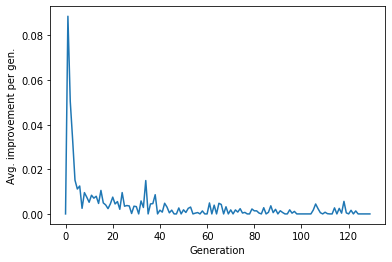

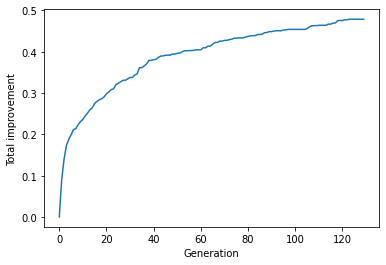

**************************************************************************************************** 
Generation 130/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 9.08291225985014e-05
Finished evaluating teritory 0
This generation took 0:12:52 to process.
Remaining 369 generations and approximately 66:13:33
Average improvement for generation: 9.08291225985014e-05 . Average total improvement: 0.4782219312573941
Total runtime: 17:01:34


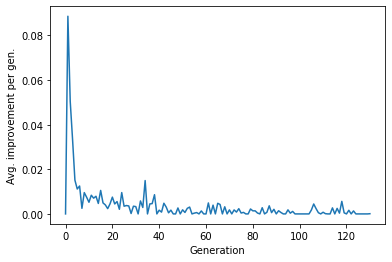

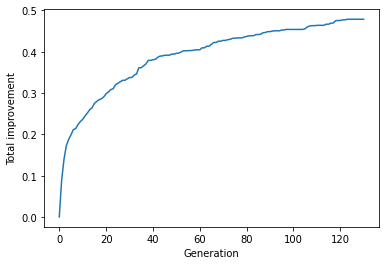

**************************************************************************************************** 
Generation 131/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.00014345109038327308
Finished evaluating teritory 0
This generation took 0:07:42 to process.
Remaining 368 generations and approximately 56:40:28
Average improvement for generation: 0.00014345109038327308 . Average total improvement: 0.47836538234777737
Total runtime: 17:09:17


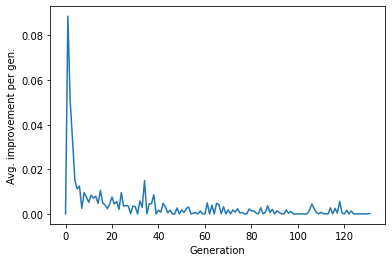

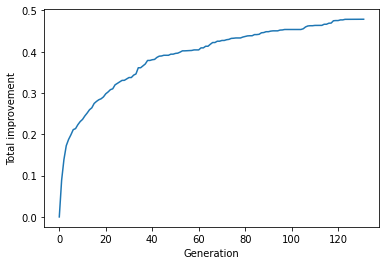

**************************************************************************************************** 
Generation 132/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:33 to process.
Remaining 367 generations and approximately 51:23:06
Average improvement for generation: 0.0 . Average total improvement: 0.47836538234777737
Total runtime: 17:16:50


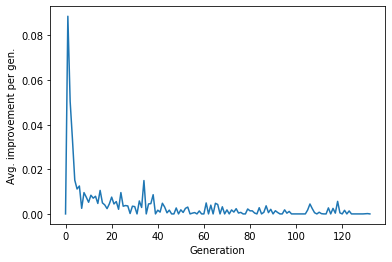

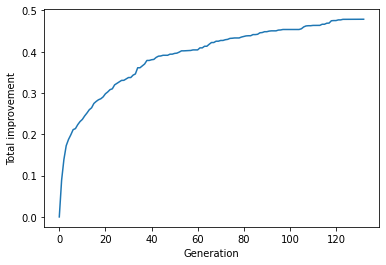

**************************************************************************************************** 
Generation 133/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:05:16 to process.
Remaining 366 generations and approximately 41:41:30
Average improvement for generation: 0.0 . Average total improvement: 0.47836538234777737
Total runtime: 17:22:07


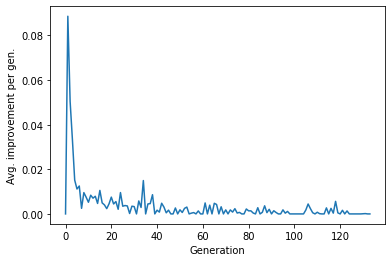

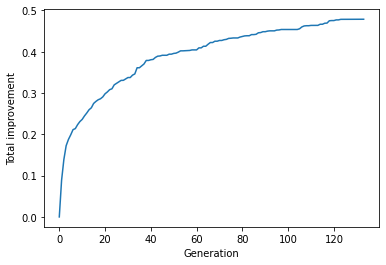

**************************************************************************************************** 
Generation 134/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.00046422066948559326
Finished evaluating teritory 0
This generation took 0:09:31 to process.
Remaining 365 generations and approximately 49:44:55
Average improvement for generation: 0.00046422066948559326 . Average total improvement: 0.47882960301726296
Total runtime: 17:31:38


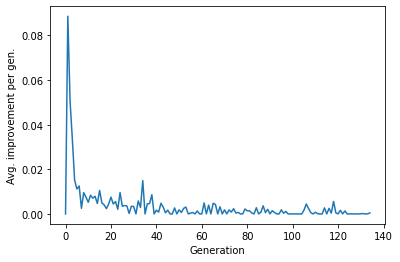

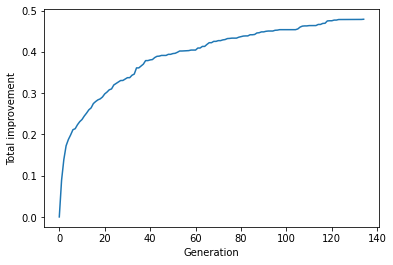

**************************************************************************************************** 
Generation 135/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0009271944637241347
Finished evaluating teritory 0
This generation took 0:06:27 to process.
Remaining 364 generations and approximately 44:22:44
Average improvement for generation: 0.0009271944637241347 . Average total improvement: 0.4797567974809871
Total runtime: 17:38:05


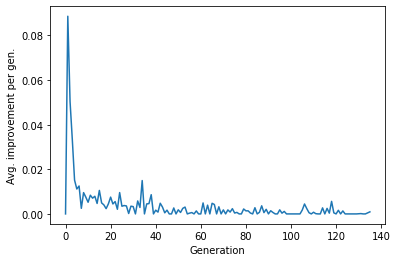

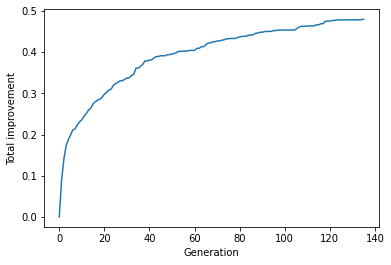

**************************************************************************************************** 
Generation 136/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:48 to process.
Remaining 363 generations and approximately 48:47:22
Average improvement for generation: 0.0 . Average total improvement: 0.4797567974809871
Total runtime: 17:46:54


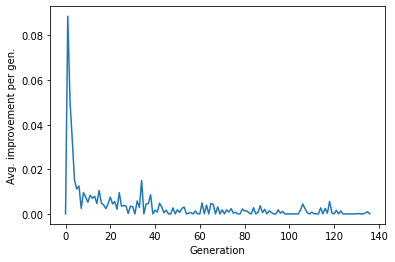

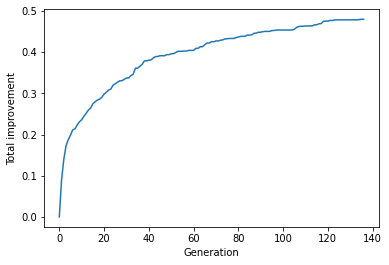

**************************************************************************************************** 
Generation 137/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:30 to process.
Remaining 362 generations and approximately 50:00:40
Average improvement for generation: 0.0 . Average total improvement: 0.4797567974809871
Total runtime: 17:55:25


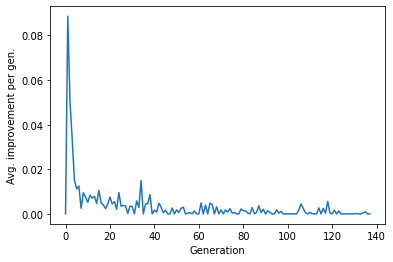

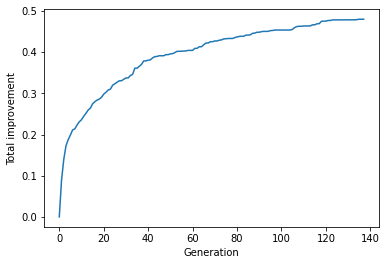

**************************************************************************************************** 
Generation 138/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.002286164844363725
Finished evaluating teritory 0
This generation took 0:06:24 to process.
Remaining 361 generations and approximately 44:11:27
Average improvement for generation: 0.002286164844363725 . Average total improvement: 0.4820429623253508
Total runtime: 18:01:49


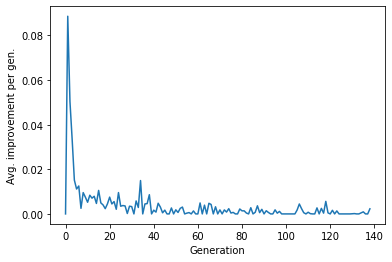

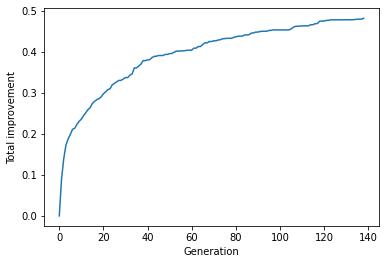

**************************************************************************************************** 
Generation 139/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:42 to process.
Remaining 360 generations and approximately 48:08:37
Average improvement for generation: 0.0 . Average total improvement: 0.4820429623253508
Total runtime: 18:10:31


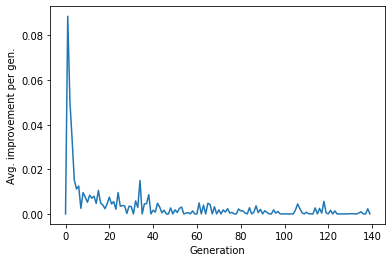

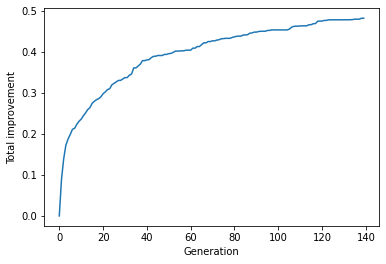

**************************************************************************************************** 
Generation 140/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0015633236382097682
Finished evaluating teritory 0
This generation took 0:05:16 to process.
Remaining 359 generations and approximately 39:46:46
Average improvement for generation: 0.0015633236382097682 . Average total improvement: 0.4836062859635606
Total runtime: 18:15:47


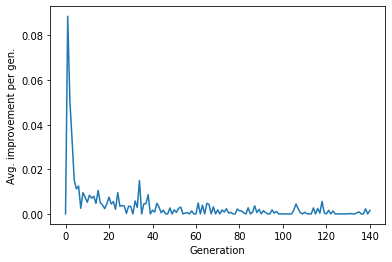

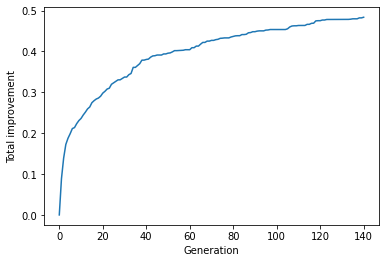

**************************************************************************************************** 
Generation 141/500
......................................................................................................................................................
Best MAE for teritory 0 is 20152.173309711106 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:25 to process.
Remaining 358 generations and approximately 41:58:39
Average improvement for generation: 0.0 . Average total improvement: 0.4836062859635606
Total runtime: 18:23:13


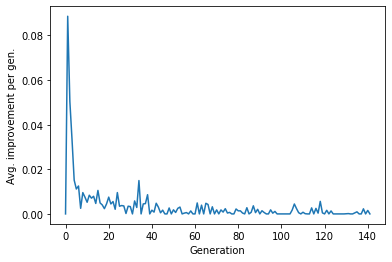

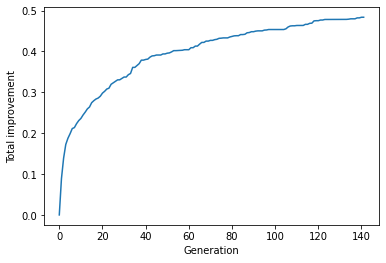

**************************************************************************************************** 
Generation 142/500
...................................................................................................................................................

In [ ]:
# Hyper parameter tuning (using a genetic algorithm)

n_features = X_train_prepped.shape[1]
n_samples = X_train_prepped.shape[0]
pop_size = 150
n_generations = 500
n_territories = 1
n_survivors = int(0.5 * pop_size)
drift_threshold = 0.001
small_step_mutation_rate = 0.1
large_step_mutation_rate = 0.01

param_limits = {
    'n_estimators':             (1, 1000),
    'max_depth':                (1, n_features),
    'min_samples_split':        (2, 1000),
    'min_samples_leaf':         (1, 1000),
    'min_weight_fraction_leaf': (0, 0.5),
    'max_features':             (1, n_features),
    'max_leaf_nodes':           (2, 10000),
    'min_impurity_decrease':    (0, 1),
    'bootstrap':                (True, False),
    'oob_score':                (True, False),
    'ccp_alpha':                (0, 1),
    'max_samples':              (1, n_samples),
}

"""
Format of ecosystem is:
{
  'last_generation': int,
  'times': [float,...],
  'improvements': [float,...],
  'average_total_improve': [float,...],
  'runtime_running_avg': float,
  'total_runtime': float,
  'avg_mae_survivors': [{
    'generation': int,
    'values': [None] * n_territories,
  }],
  'teritories': [
    [{hp:{}, mae=None},...],
    .
    .
    .
  ]
}
"""
ecosystem = {
    'last_generation': 0,
    'times': [],
    'improvements': [],
    'average_total_improve': [],
    'runtime_running_avg': 0,
    'total_runtime': 0,
    'avg_mae_survivors': [],
    'teritories': []
}


def init_env(ecosystem):
  teritories = []
  for i in range(n_territories):
    teritories.append([])
  ecosystem['teritories'] = teritories


def init_HP():
  """
  Provides a randomly initialized set of hyper parameters for a RandomForestRegressor
  """

  global n_features, n_samples, param_limits

  HP = {
      'n_estimators': int(random.randint(*param_limits['n_estimators'])),
      'max_depth': int(random.randint(*param_limits['max_depth'])),
      'min_samples_split': int(random.randint(*param_limits['min_samples_split'])),
      'min_samples_leaf': int(random.randint(*param_limits['min_samples_leaf'])),
      'min_weight_fraction_leaf': random.uniform(*param_limits['min_weight_fraction_leaf']),
      'max_features': int(random.randint(*param_limits['max_features'])),
      'max_leaf_nodes': int(random.randint(*param_limits['max_leaf_nodes'])),
      'min_impurity_decrease': random.uniform(*param_limits['min_impurity_decrease']),
      'bootstrap': bool(random.choice((True, False))),
      'oob_score': False,
      'ccp_alpha': random.uniform(*param_limits['ccp_alpha']),
      'max_samples': int(random.randint(*param_limits['max_samples'])),
  }

  if HP['bootstrap'] == True:
    HP['oob_score'] = bool(random.choice((True, False)))
  
  return HP


def evaluate_model(model, X_train, X_cv, y_train, y_cv):
  model.fit(X_train_prepped, y_train)
  pred = model.predict(X_cv_prepped)
  return mean_absolute_error(pred, y_cv)


def ragnge_size(limits):
  return limits[1] - limits[0]


def small_step_mutation(zygote):
  zygote['n_estimators'] = max(1, zygote['n_estimators'] + int(np.random.normal(0, ragnge_size(param_limits['n_estimators']) * small_step_mutation_rate)))
  zygote['max_depth'] = min(max(1, zygote['max_depth'] + int(np.random.normal(0, int(ragnge_size(param_limits['max_depth']) * small_step_mutation_rate)))), n_features)
  zygote['min_samples_split'] = max(2, zygote['min_samples_split'] + int(np.random.normal(0, ragnge_size(param_limits['min_samples_split']) * small_step_mutation_rate)))
  zygote['min_samples_leaf'] = max(1, zygote['min_samples_leaf'] + int(np.random.normal(0, ragnge_size(param_limits['min_samples_leaf']) * small_step_mutation_rate)))
  zygote['min_weight_fraction_leaf'] = min(max(0, zygote['min_weight_fraction_leaf'] + np.random.normal(0, ragnge_size(param_limits['min_weight_fraction_leaf']) * small_step_mutation_rate)), 0.5)
  zygote['max_features'] = min(max(1, zygote['max_features'] + int(np.random.normal(0, int(ragnge_size(param_limits['max_features']) * small_step_mutation_rate)))), n_features)
  zygote['max_leaf_nodes'] = max(2, zygote['max_leaf_nodes'] + int(np.random.normal(0, ragnge_size(param_limits['max_leaf_nodes']) * small_step_mutation_rate)))
  zygote['min_impurity_decrease'] += max(0, np.random.normal(0, ragnge_size(param_limits['min_impurity_decrease']) * small_step_mutation_rate))
  zygote['bootstrap'] = bool(np.random.choice([True, False], p=[1 - small_step_mutation_rate if x==zygote['bootstrap'] else small_step_mutation_rate for x in [True, False]]))
  zygote['oob_score'] = bool(np.random.choice([True, False], p=[1 - small_step_mutation_rate if x==zygote['oob_score'] else small_step_mutation_rate for x in [True, False]]))
  zygote['ccp_alpha'] = max(0, zygote['ccp_alpha'] + int(np.random.normal(0, ragnge_size(param_limits['ccp_alpha']) * small_step_mutation_rate)))
  zygote['max_samples'] = min(max(1, zygote['max_samples'] + int(np.random.normal(0, ragnge_size(param_limits['max_samples']) * small_step_mutation_rate))), n_samples)

  if zygote['bootstrap'] == False:
    zygote['oob_score'] = False
  
  return zygote


def should_do_large_step():
  return np.random.choice([True, False], p=[1 - large_step_mutation_rate, large_step_mutation_rate])


def large_step_mutation(zygote):
  global param_limits

  if should_do_large_step():
    zygote['n_estimators'] = int(random.randint(*param_limits['n_estimators']))
  if should_do_large_step():
    zygote['max_depth'] = int(random.randint(*param_limits['max_depth']))
  if should_do_large_step():
    zygote['min_samples_split'] = int(random.randint(*param_limits['min_samples_split']))
  if should_do_large_step():
    zygote['min_samples_leaf'] = int(random.randint(*param_limits['min_samples_leaf']))
  if should_do_large_step():
    zygote['min_weight_fraction_leaf'] = random.uniform(*param_limits['min_weight_fraction_leaf'])
  if should_do_large_step():
    zygote['max_features'] = int(random.randint(*param_limits['max_features']))
  if should_do_large_step():
    zygote['max_leaf_nodes'] = int(random.randint(*param_limits['max_leaf_nodes']))
  if should_do_large_step():
    zygote['min_impurity_decrease'] = random.uniform(*param_limits['min_impurity_decrease'])
  if should_do_large_step():
    zygote['bootstrap'] = bool(random.choice((True, False)))
  if should_do_large_step():
    zygote['oob_score'] = bool(random.choice((True, False)))
  if should_do_large_step():
    zygote['ccp_alpha'] = random.uniform(*param_limits['ccp_alpha'])
  if should_do_large_step():
    zygote['max_samples'] = int(random.randint(*param_limits['max_samples']))

  if zygote['bootstrap'] == False:
    zygote['oob_score'] = False
  
  return zygote


def mutate(zygote):
  zygote = small_step_mutation(zygote)
  zygote = large_step_mutation(zygote)
  return zygote


def fertilize(male, female):
  parents = [male, female]

  return mutate({
      'n_estimators': random.choice(parents)['hp']['n_estimators'],
      'max_depth': random.choice(parents)['hp']['max_depth'],
      'min_samples_split': random.choice(parents)['hp']['min_samples_split'],
      'min_samples_leaf': random.choice(parents)['hp']['min_samples_leaf'],
      'min_weight_fraction_leaf': random.choice(parents)['hp']['min_weight_fraction_leaf'],
      'max_features': random.choice(parents)['hp']['max_features'],
      'max_leaf_nodes': random.choice(parents)['hp']['max_leaf_nodes'],
      'min_impurity_decrease': random.choice(parents)['hp']['min_impurity_decrease'],
      'bootstrap': random.choice(parents)['hp']['bootstrap'],
      'oob_score': random.choice(parents)['hp']['oob_score'],
      'ccp_alpha': random.choice(parents)['hp']['ccp_alpha'],
      'max_samples': random.choice(parents)['hp']['max_samples'],
  })


def breed(population):
  male, female = random_gen.choice(population[:n_survivors], replace=False, size=2)
  return {'hp': fertilize(male, female), 'mae': None}


def perform_drift(teritories, idx):
  teritory_1 = teritories[idx]
  teritory_2 = random.choice([x for x in teritories if x is not teritory_1])
  specimen_1 = random_gen.choice(teritory_1)
  specimen_2 = random_gen.choice(teritory_2)
  teritory_1.remove(specimen_1)
  teritory_2.remove(specimen_2)
  teritory_1.append(specimen_2)
  teritory_2.append(specimen_1)


class Survivor:
  def __init__(self, hp, mae):
    self.hp = hp
    self.mae = mae
  
  def __lt__(self, other):
    return self.mae < other.mae
  
  def to_dict(self):
    return {'hp': self.hp, 'mae': self.mae}


def seconds2timestr(seconds): 
  hour = seconds // 3600
  seconds %= 3600
  minutes = seconds // 60
  seconds %= 60
  
  return "%d:%02d:%02d" % (hour, minutes, seconds)


def process_specimen(population, idx):
  global preped_X_train, preped_X_cv, y_train, y_cv
  if population[idx]['mae'] is None:
    model = model_from_hp(population[idx]['hp'])
    population[idx]['mae'] = evaluate_model(model, X_train_prepped, X_cv_prepped, y_train, y_cv)
  return population[idx]


def process_teritory(ecosystem, need_drift, idx, executor):
    teritories = ecosystem['teritories']
    futures = [executor.submit(process_specimen, teritories[idx], i) for i in range(len(teritories[idx]))]
    survivors = []
    for future in concurrent.futures.as_completed(futures):
        heapq.heappush(survivors, Survivor(**future.result()))
        print('.', end='')
    normal = random_gen.normal(0, n_survivors, size=len(teritories[idx]))
    abs_normal = np.abs(normal)
    probs = abs_normal / np.sum(abs_normal)
    sorted_probs = sorted(probs, reverse=True)
    for i in range(n_survivors, len(sorted_probs)):
      for j in range(n_survivors):
        sorted_probs[j] += sorted_probs[i] / 2
        sorted_probs[i] /= 2
    survivors = random_gen.choice(survivors, replace=False, size=n_survivors, p=sorted_probs)
    survivors = sorted(survivors.tolist())
    # survivors = heapq.nsmallest(n_survivors, survivors)
    new_avg_mae_survivors = np.mean([x.mae for x in survivors])
    try:
      improvement = ecosystem['avg_mae_survivors'][-2]['values'][idx] / new_avg_mae_survivors - 1
      if n_territories > 1 and improvement < drift_threshold:
        need_drift[idx] = True
    except Exception as ex:
      improvement = 0
    ecosystem['avg_mae_survivors'][-1]['values'][idx] = new_avg_mae_survivors
    print("\nBest MAE for teritory", idx, "is", survivors[0].mae, ". Average improvement is", improvement)
    teritories[idx] = [x.to_dict() for x in survivors]
    offsprings = []
    futures = [executor.submit(breed, teritories[idx]) for i in range((pop_size - len(teritories[idx])))]
    for future in concurrent.futures.as_completed(futures):
        offsprings.append(future.result())
    teritories[idx] += offsprings
    print("Finished evaluating teritory", idx)
    return improvement


try:
  with open(os.path.join(project_files_path, 'ecosystem.json')) as f:
    ecosystem = json.load(f)
    generations_passed = ecosystem['last_generation'] + 1
except Exception as e:
  for i in range(n_territories):
    ecosystem['teritories'].append([{'hp': init_HP(), 'mae': None} for i in range(int(pop_size))])
  generations_passed = 0

# Supress warnings to avoid terminal clutter
logging.captureWarnings(True)


with concurrent.futures.ThreadPoolExecutor() as executor:
  for generation in range(generations_passed, n_generations):
    print("*" * 100, "\nGeneration", str(generation) + '/' + str(n_generations))
    start_time = time.time()
    need_drift = [False] * n_territories
    ecosystem['avg_mae_survivors'].append({'generation': generation, 'values':[0] * n_territories})
    improvements = []
    futures = [executor.submit(process_teritory, ecosystem, need_drift, idx, executor) for idx in range(len(ecosystem['teritories']))]
    for future in concurrent.futures.as_completed(futures):
      improvements.append(future.result())
    average_improve = float(np.mean(improvements))
    try:
      ecosystem['average_total_improve'].append(ecosystem['average_total_improve'][-1] + average_improve)
    except:
      ecosystem['average_total_improve'].append(average_improve)
    ecosystem['improvements'].append(average_improve)
    sum_drifts = sum(need_drift)
    # n_survivors = max(MIN_SURVIVORS, min(pop_size - 5, n_survivors - 2 + sum_drifts))
    small_step_mutation_rate = 0.1 * (sum_drifts + 1)
    large_step_mutation_rate = 0.01 * (sum_drifts + 1)
    if n_territories > 1:
      print("Need drift:", sum_drifts) 
      for i in range(len(need_drift)):
        if need_drift[i] is True:
          perform_drift(ecosystem['teritories'], i)
    ecosystem['last_generation'] = generation
    end_time = time.time()
    generation_process_time = end_time - start_time
    ecosystem['total_runtime'] += generation_process_time
    ecosystem['runtime_running_avg'] = (ecosystem['runtime_running_avg'] + generation_process_time) / 2
    ecosystem['times'].append(generation_process_time)
    with open(os.path.join(project_files_path, 'ecosystem.json'), 'w') as f:
      json.dump(ecosystem, f)
    remaining_generations = n_generations - generation - 1
    print("This generation took", seconds2timestr(generation_process_time), "to process.")
    print("Remaining", remaining_generations, "generations and approximately", seconds2timestr(ecosystem['runtime_running_avg'] * remaining_generations))
    print("Average improvement for generation:", average_improve, ". Average total improvement:", ecosystem['average_total_improve'][-1])
    print("Total runtime:", seconds2timestr(ecosystem['total_runtime']))
    plt.plot(ecosystem['improvements'])
    plt.xlabel("Generation")
    plt.ylabel("Avg. improvement per gen.")
    plt.show()
    plt.plot(ecosystem['average_total_improve'])
    plt.xlabel("Generation")
    plt.ylabel("Total improvement")
    plt.show()
    

In [ ]:
# Prepeare test predictions
with open(os.path.join(project_files_path, 'ecosystem.json')) as f:
    ecosystem = json.load(f)

X_train_cv = pd.concat([preped_X_train, preped_X_cv], axis=0)
y_train_cv = pd.concat([y_train, y_cv], axis=0)

best_hp = ecosystem['teritories'][0][0]['hp']
best_mae = ecosystem['teritories'][0][0]['mae']
for teritory in ecosystem['teritories']:
  for specimen in teritory:
    if specimen['mae'] is not None and specimen['mae'] < best_mae:
      best_mae = specimen['mae']
      best_hp = specimen['hp']

print(best_hp)

model = model_from_hp(best_hp)

print("Fitting")

model.fit(X_train_cv, y_train_cv)

print("Predicting")

preds_test = model.predict(preped_X_test)

print("Saving")

output = pd.DataFrame({'Id': preped_X_test.Id.astype('int32'),
                       'SalePrice': preds_test})
output.to_csv(os.path.join(project_files_path, 'submission_gen.csv'), index=False)

In [ ]:
output = pd.DataFrame({'Id': preped_X_test.Id.astype('int32'),
                       'SalePrice': preds_test})
output.to_csv(os.path.join(project_files_path, 'submission_gen.csv'), index=False)